## JDSZR6, Jonasz Krawczyk

## zadanie domowe nr 14
treść zadania:

Zapoznaj się z danymi: https://www.kaggle.com/datasets/weinoose/migraine-classification dotyczącymi klasyfikacji migreny (zmienna y= 'Type').
Dokonaj analizy zbioru oraz przekształć zmienną y na postać 0/1 według własnego podejścia.
Korzystając z klasy poznanej na zajęciach ("modelANN_ext") stwórz model sieci neuronowej. Wytypuj najlepszą Twoim zdaniem funkcję aktywacji. 
Zoptymalizuj parametry modelu: na początku learning rate, a później liczbę neuronów w wartswie ukrytej. 

### 1. import pakietów, ustawienia wstępne

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.weightstats import ztest
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, fbeta_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['figure.dpi']= 100

### 2. EDA

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [4]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [5]:
df.shape

(400, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [7]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [8]:
df.isna().any()

Age            False
Duration       False
Frequency      False
Location       False
Character      False
Intensity      False
Nausea         False
Vomit          False
Phonophobia    False
Photophobia    False
Visual         False
Sensory        False
Dysphasia      False
Dysarthria     False
Vertigo        False
Tinnitus       False
Hypoacusis     False
Diplopia       False
Defect         False
Ataxia         False
Conscience     False
Paresthesia    False
DPF            False
Type           False
dtype: bool

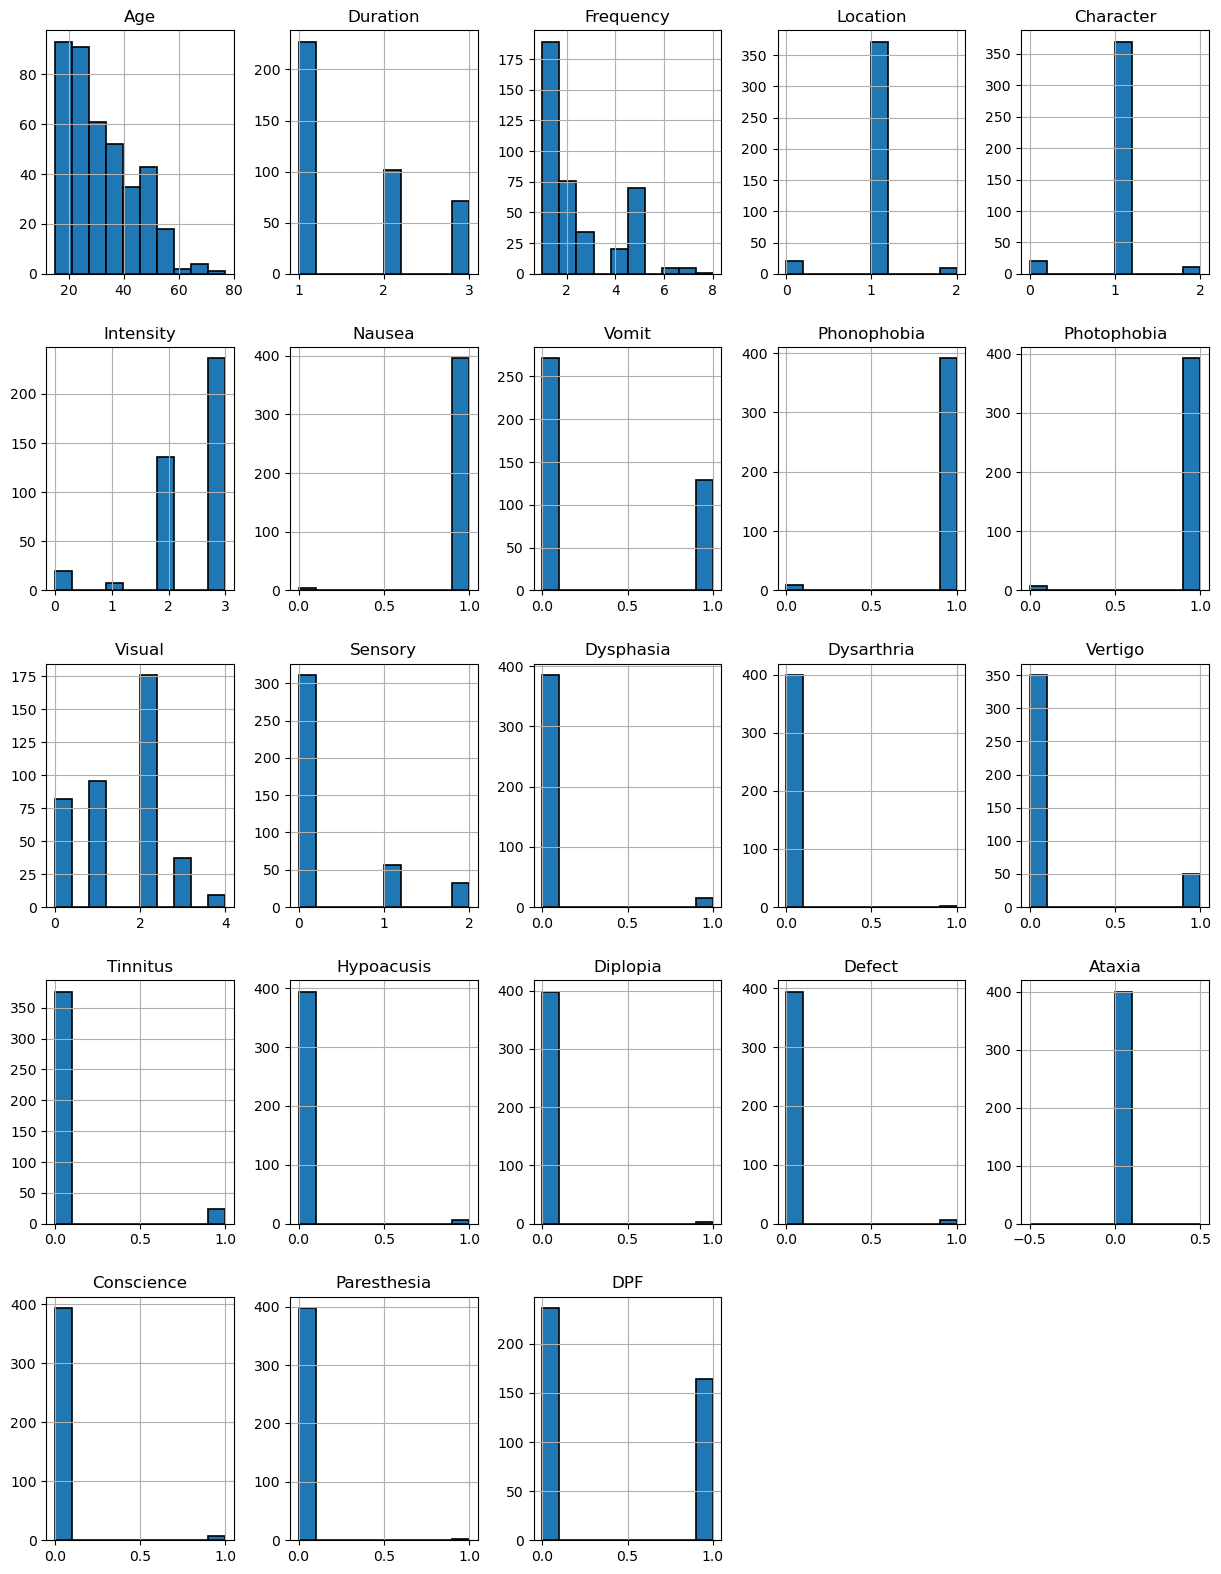

In [9]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(15, 20))
plt.show()

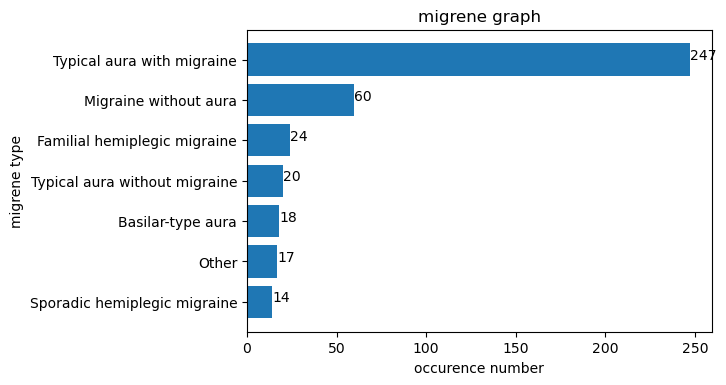

In [10]:
plt.figure(figsize=(6, 4))
data = df.Type.value_counts()
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("migrene graph")
plt.ylabel("migrene type")
plt.xlabel("occurence number")

plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

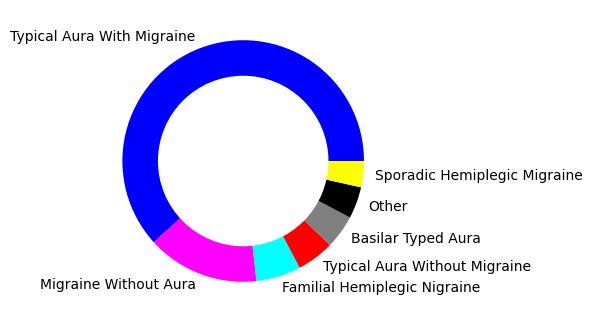

In [11]:
plt.figure(figsize=(6, 4))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.Type.value_counts(),
        labels=[
            'Typical Aura With Migraine', 'Migraine Without Aura',
            'Familial Hemiplegic Nigraine', 'Typical Aura Without Migraine',
            'Basilar Typed Aura', 'Other', 'Sporadic Hemiplegic Migraine'
        ],
        colors=['blue', 'magenta', 'cyan', 'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)
pass

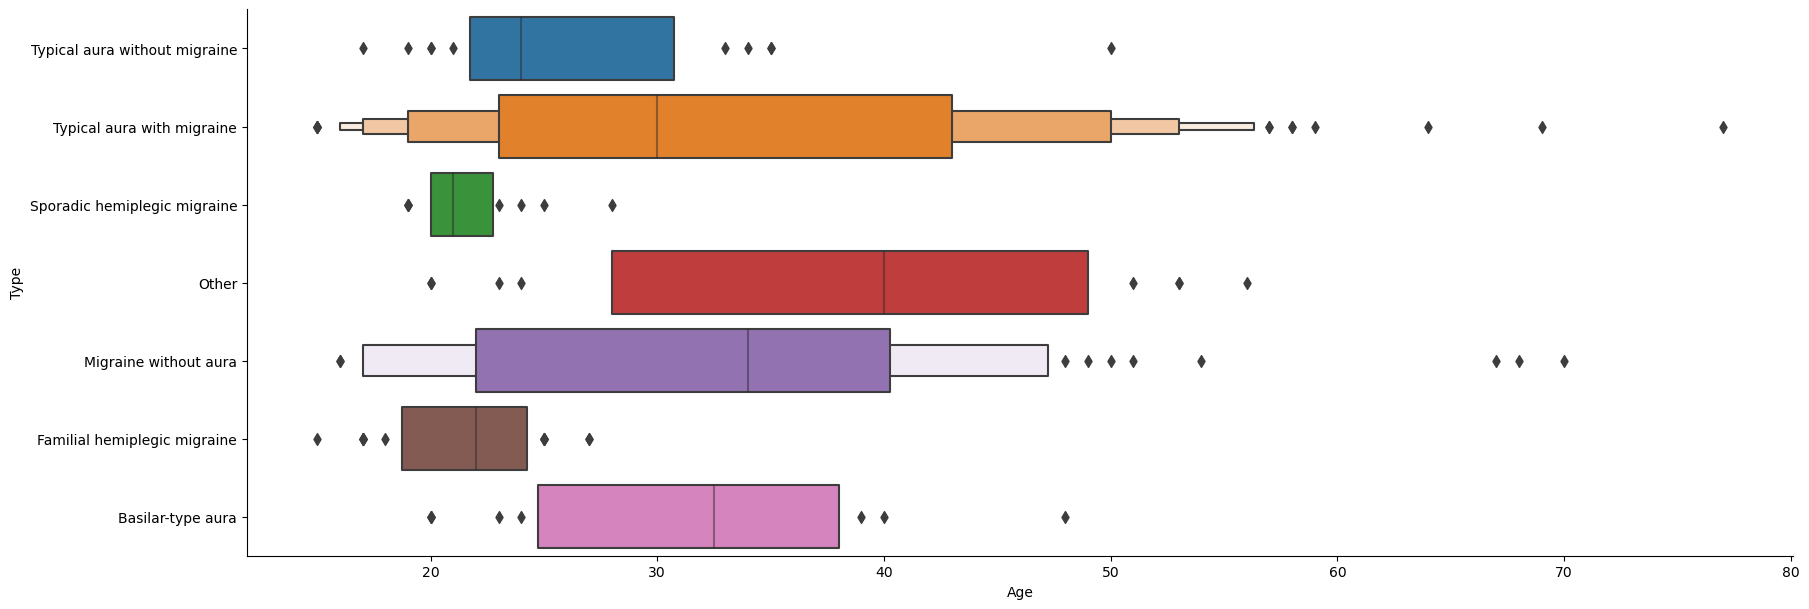

In [12]:
sns.catplot(y='Type',
            x='Age',
            data=df.sort_values("Type", ascending=False),
            kind='boxen',
            height=6,
            aspect=3)
pass

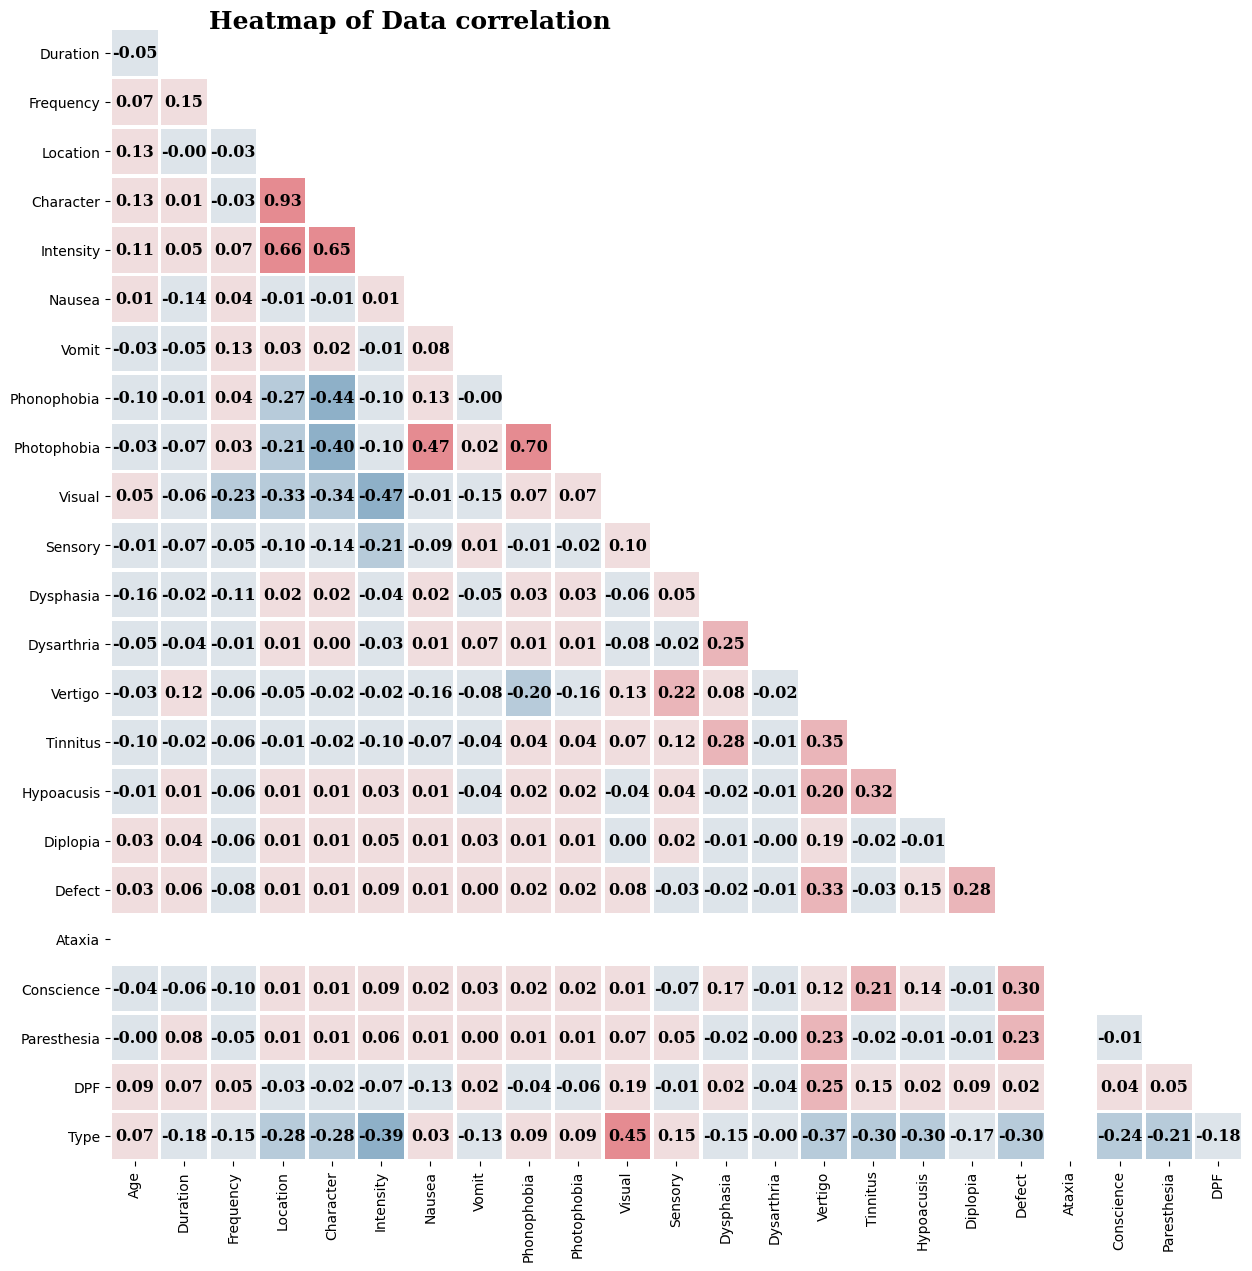

In [13]:
le = LabelEncoder()

plt.figure(figsize=(15, 15))
df_copy1 = df.copy()
objList = df_copy1.select_dtypes(include="object").columns

for col in objList:
    df_copy1[col] = le.fit_transform(df_copy1[col].astype(str))

df_corr = df_copy1.corr()
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(df_corr), k=0)
mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap=color_map,
            center=0,
            vmin=-0.935,
            vmax=0.467,
            cbar=False,
            linewidth=2,
            square=True,
            annot_kws={
                'font': 'serif',
                'size': 11.5,
                'color': 'black',
                'fontweight': 'bold'
            })
plt.text(2,
         0,
         'Heatmap of Data correlation',
         fontsize=18,
         fontweight='bold',
         fontfamily='serif')
pass

**przygotowanie danych**

zmienię mu typ inta na bardziej oszczędny

In [14]:
for col in df.columns[:-1]:
    df[col] = df[col].astype('Int32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    Int32 
 1   Duration     400 non-null    Int32 
 2   Frequency    400 non-null    Int32 
 3   Location     400 non-null    Int32 
 4   Character    400 non-null    Int32 
 5   Intensity    400 non-null    Int32 
 6   Nausea       400 non-null    Int32 
 7   Vomit        400 non-null    Int32 
 8   Phonophobia  400 non-null    Int32 
 9   Photophobia  400 non-null    Int32 
 10  Visual       400 non-null    Int32 
 11  Sensory      400 non-null    Int32 
 12  Dysphasia    400 non-null    Int32 
 13  Dysarthria   400 non-null    Int32 
 14  Vertigo      400 non-null    Int32 
 15  Tinnitus     400 non-null    Int32 
 16  Hypoacusis   400 non-null    Int32 
 17  Diplopia     400 non-null    Int32 
 18  Defect       400 non-null    Int32 
 19  Ataxia       400 non-null    

Usunę zmienną, która jest bezwartościowa.

In [16]:
df.drop(['Ataxia'], axis=1, inplace=True)

Zrzutuję odpowiednie kategorie Type'u na zera i jedynki.

In [17]:
df["Type"].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [18]:
df['Type'] = df['Type'].replace([
    'Typical aura with migraine', 'Migraine without aura',
    'Sporadic hemiplegic migraine', 'Familial hemiplegic migraine'
], 1)

In [19]:
df['Type'] = df['Type'].replace(
    ['Basilar-type aura', 'Other', 'Typical aura without migraine'], 0)

In [20]:
df.Type.value_counts()

1    345
0     55
Name: Type, dtype: int64

In [21]:
df["Type"] = df["Type"].astype('Int32')

Założę, że średnie poszczególnych zmiennych nie zmieniają się w odniesieniu do stwierdzenia zjawiska migreny.

In [22]:
possibly_important_feats = []
possibly_not_important_feats = []
for col in df.columns[:-1]:
    non_migrene_events = df[df['Type'] == 0][col]
    migrene_events = df[df['Type'] == 1][col]
    ttest, pval = ztest(x1 = non_migrene_events, x2 = migrene_events)
    if pval <= 0.05:
        possibly_important_feats.append(col)
#         print('The null hypothesis can be rejected for %s. The averages are statistically different' %col)
    else:
        possibly_not_important_feats.append(col)
#         print('The null hypothesis cannot be rejected %s. The averages are not statistically different' %col)

In [23]:
print(
    possibly_not_important_feats,
    "\nnie wydają się zmiennymi, które znacząco pomogą przewidzieć migrenę w oparciu o te dane."
)
print()
print(possibly_important_feats,
      "\nzdają się mieć statystycznie różne średnie w odn. do migreny - można okreslić je jako funkcje wpływu na wynik.")

['Age', 'Frequency', 'Vomit', 'Dysphasia', 'Dysarthria'] 
nie wydają się zmiennymi, które znacząco pomogą przewidzieć migrenę w oparciu o te dane.

['Duration', 'Location', 'Character', 'Intensity', 'Nausea', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF'] 
zdają się mieć statystycznie różne średnie w odn. do migreny - można okreslić je jako funkcje wpływu na wynik.


In [24]:
avg_by_migrene = df.groupby('Type').mean().transpose()
sem_by_migrene = df.groupby('Type').sem().transpose()

In [25]:
labels = ['healthy', 'migrene']

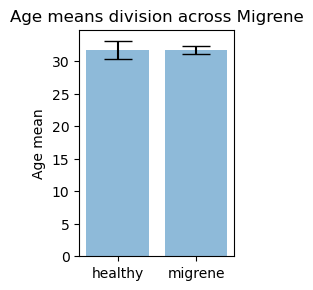

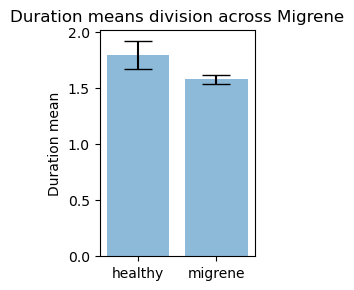

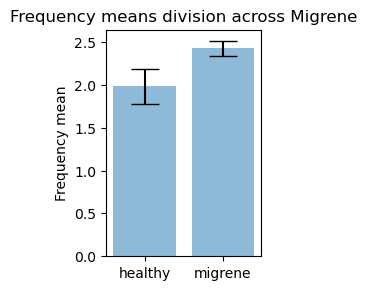

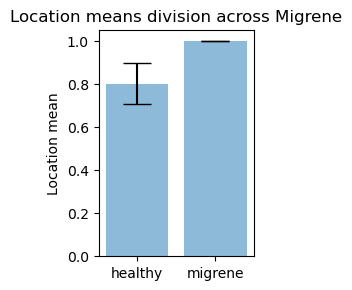

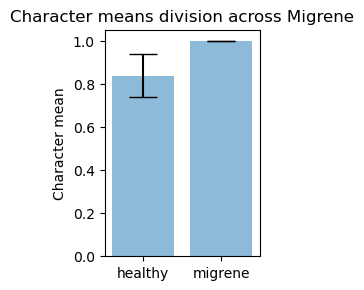

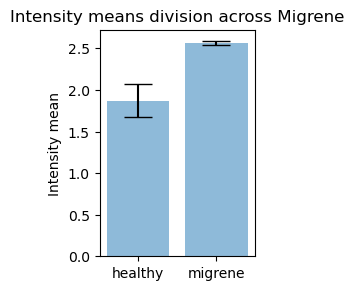

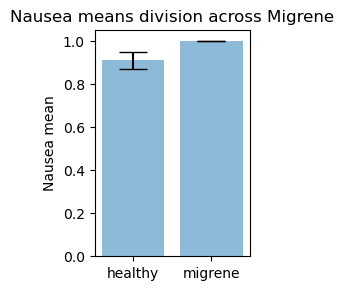

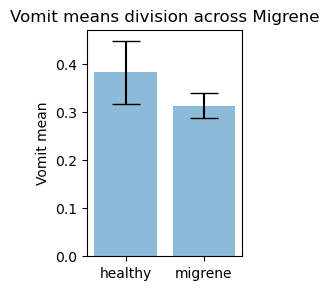

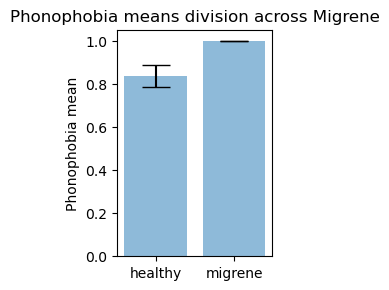

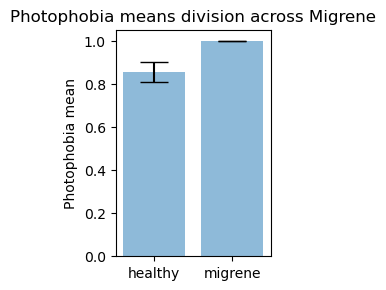

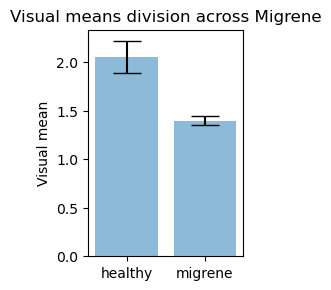

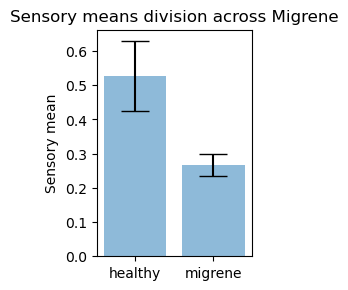

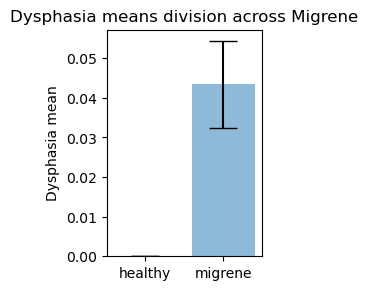

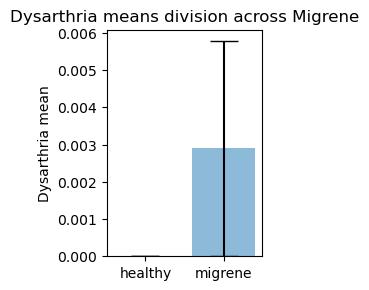

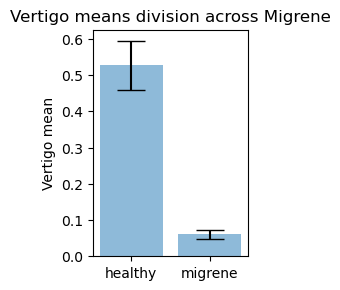

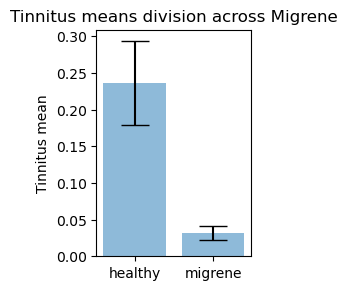

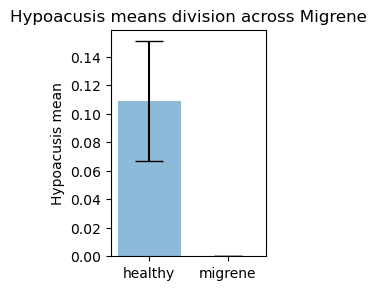

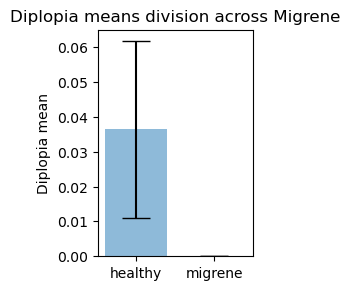

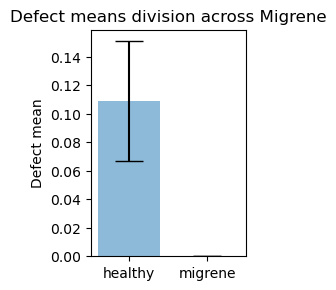

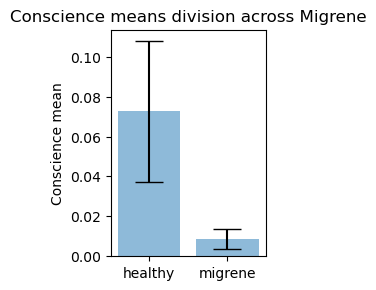

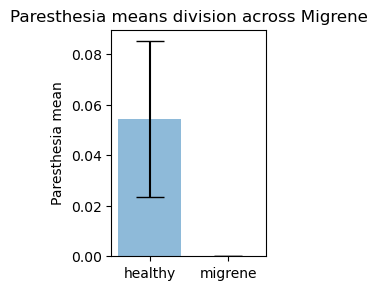

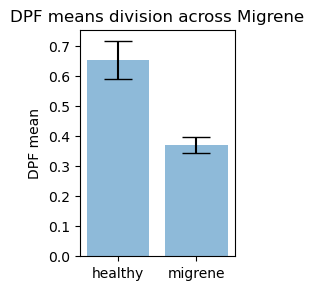

In [26]:
for i in range(len(sem_by_migrene)):
    fig, ax = plt.subplots()
    ax.bar(labels, avg_by_migrene.iloc[i],
           yerr=sem_by_migrene.iloc[i],
           align='center',
           alpha=0.5,
           ecolor='black',
           capsize=10)
    plt.title("%s means division across Migrene" %df.columns[i])
    plt.ylabel("%s mean" %df.columns[i])
    fig.set_size_inches(2, 3)
    plt.show()

**wnioski po analizie danych**<br>
Zmienne zależne są liczbowe, nie wymagają szczególnych przekształceń. Zmienna "Ataxia" zawiera same zera, niczego nie prezentuje co widać także na heatmapie korelacji - została usunięta. Zmienne silnie skorelowane to "Character" i "Location". Zdaje się jednak, że na potrzeby DL nie musimy się tym przejmować.<br>
Zmienna Type zawiera stany charakteryzujące migrenę i inne. Dane dotyczą raczej stanów migrenowych, powstało więc dużo zer, tj. niezbalansowany dataset.<br>
W danych nie widać problematycznych outlierów.<br>
Migrena dopada ludzi raczej młodych + w średnim wieku.

### 3. wybór metryki oceny klasyfikatora

Nie ma tu balansu w ilości próbek klas targetu, stąd ACC nie będzie dobrym wskaźnikiem.<br>
Zakładam, że dopuszczam sytuację w której predyktor zaklasyfikuje osobę jako cierpiącą na migrenę, choćby bóle głowy pojawiały się z innego powodu. Leki na migrenę są dość powszechne i nie są uważane za szczególnie niebezpieczne dla zdrowia toteż ich podanie nie powinno zaskutkować poważnymi konsekwencjami. <br>
Przekładając na język Data Science - mogę sobie pozwolić na wysokie False Positive "jedynek" - t.j. niekoniecznie precyzja jest bardzo istotna.<br>
Z drugiej strony niezapisanie recepty leku na migrenę w przypadku gdy ona rzeczywiście ma miejsce spowoduje, że pacjent trochę dłużej pocierpi albo weźmie z jakiegoś kiosku zwykły lek na ogólny ból głowy. Jednak po coś on przyszeł do lekarza, niepokoją go objawy. Niestety powoli potwierdzam powszechną praktykę aby zapisać lek dla świętego spokoju (w przypadku choroby nie bardzo niebezpiecznej).<br>
Przekładając na język Data Science - zaklasyfikowanie jako False Negative też nie jest bardzo złe ale może być źle odebrane.<br><br>
Miarą oceny wyników będzie f-beta score, delikatnie dostrojony w stronę recall; beta = 1.31 <br>

### 4. model sieci neuronowej

Na początek podział zbioru, do późniejszej oceny wyników:

In [27]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1:]

In [28]:
print (X.shape)
print (y.shape)

(400, 22)
(400, 1)


In [29]:
for i in range(1, 100, 1):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=i)
    y_train1 = y_train.value_counts()[1]
    y_train0 = y_train.value_counts()[0]
    y_train_ratio = round((y_train1 / y_train0), 3)
    y_test1 = y_test.value_counts()[1]
    y_test0 = y_test.value_counts()[0]
    y_test_ratio = round((y_test1 / y_test0), 3)
    if (y_test_ratio - 0.01) <= y_train_ratio <= (y_test_ratio + 0.01):
        print("examplary nice split random_state: ", i)
        break

examplary nice split random_state:  8


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=8)
print('target ratio in train set:\n',
      round(y_train.value_counts()[1] / y_train.value_counts()[0], 3))
print('target ratio in test set:\n',
      round(y_test.value_counts()[1] / y_test.value_counts()[0], 3))
total_ratio = (df["Type"].value_counts(0)[1] / df["Type"].value_counts(0)[0])
print("target ratio in entire df:\n", round(total_ratio, 3))

target ratio in train set:
 6.273
target ratio in test set:
 6.273
target ratio in entire df:
 6.273


konwersja na potrzeby tensorflowa:

In [31]:
X_train = X_train.to_numpy(dtype='float32')
X_test = X_test.to_numpy(dtype='float32')

In [32]:
y_train = y_train.to_numpy(dtype='float32')
y_test = y_test.to_numpy(dtype='float32')

sieknę mu jeszcze normalizację, żeby nie faworyzować niektórych zmiennych (zniwelowanie efektu wagi)

In [33]:
NoSc = MinMaxScaler()

In [34]:
X_train = NoSc.fit_transform(X_train)
X_test = NoSc.fit_transform(X_test)

copy-paste klasy. <br>
wcześniej sprawdzę jednak czy wszystko jest z nią ok:<br>
- ilości informacji wejściowych - trzeba dostroić, wstawię z df.shapea
- ilość informacji wyjściowych - 1, czyli w porządku
- zastosowana funkcja aktywacji warstwy ukrytej - relu, ok
- zastosowana funkcja aktywacji warstwy ukrytej - sigmoid, ok
- funkcja straty - jest MSE czyli miara typowa dla regresji ale mamy klasyfikację. Z drugiej strony na ćwiczeniach to właśnie MSE było używane do obtrzaskania problemu XORa czyli klasyfikacji. Zakładam więc, że może tak być; zostaje MSE.


In [35]:
entrances = X_train.shape[1]

In [36]:
# zbudowanie modelu jako klasy
class modelANN(object):
    """
    Simple Neural Network
    """
    def __init__(self, hNum, lr):
        """
        :param hNum: number of neurons in hidden layer
        :param lr: leraning rate
        """
        # inicjalizacja learnig rate'u
        # wielkość ta parametryzuje wielkość korekt wag sieci
        self.lr = lr
        
        # ilość wejść
        self.inNum = entrances
        # ilość wyjść
        self.outNum = 1
        
        #inicjalizacja wag
        #warstwa wejściowa to same wejścia, wszystko leci na ukrytą
        
        # warstwa ukryta, hNum neuronów, po 22(?) wejścia na każdy neuron
        self.W_h = tf.Variable(tf.random.normal([self.inNum,hNum]))
        self.b_h = tf.Variable(tf.zeros([hNum]))
        
        # warstwa wyjściowa, self.outNum neuron z hNum wejściami
        self.W_out = tf.Variable(tf.random.normal([hNum,self.outNum]))
        self.b_out = tf.Variable(tf.zeros([self.outNum]))

    def predict(self, x):
        """
        :param x: input data, 2D - [batch, features], batch could be None, also could be one row of feature, but also 2D
        """
        # feed forward
        # wejściowa warstwa
        layer_in = x
        # warstwa ukryta
            # mnożymy przez wagi i dodajemy biasy
        layer_hidden = tf.add(tf.matmul(layer_in, self.W_h), self.b_h)
            # przechodzimy z sygnałem przez funkcję aktywacji
        layer_hidden = tf.nn.relu(layer_hidden)
        
        # warstwa wyjściowa
            # mnożymy przez wagi i dodajemy biasy
        layer_out = tf.add(tf.matmul(layer_hidden, self.W_out), self.b_out)
            # przechodzimy z sygnałem przez funkcję aktywacji
            # sigmoid z tego względu, aby otrzymać znormalizowane wyjście w zakresie 0-1
        layer_out = tf.nn.sigmoid(layer_out)
        return layer_out

    def weightsUpdate(self, dW_h, db_h, dW_out, db_out):
        """
        :param dW_h:  hidden layer weights derivative
        :param db_h:  hidden layer bias derivative
        :param dW_out:  out layer weights derivative
        :param db_out:  out layer bias derivative
        """
        # korekta wag warstwy ukrytej
        # W_h = W_h-(lr*dW_h)
        self.W_h.assign_sub(self.lr * dW_h)
        # korekta biasu warstwy ukrytej
        self.b_h.assign_sub(self.lr * db_h)
        # korekta wag warstwy wyjściowej
        self.W_out.assign_sub(self.lr * dW_out)
        # korekta biasu warstwy wyjściowej
        self.b_out.assign_sub(self.lr * db_out)
    
    def lossMSE(self, y_pred, y_true):
        """
        :param y_pred: predicted data, from model
        :param y_true: true output from model
        """
        # zmiana kształtu referencji na potrzeby oblcizeń macierzowych
        y_true = tf.reshape(y_true, (-1, self.outNum))
        return tf.reduce_mean(tf.square(y_pred - y_true))
    
    def fit(self, x, y_true):
        """
        :param x: training data
        :param y_true: connected to x, real output
        """
        # definicja taśmy
        with tf.GradientTape() as t:
            # wyznaczenie błędu
            # tutaj jest uruchomiony cały model i policzony błąd
            # więc pod taśmę wchodzi cały model wraz z funkcją błędu !!!!
            y_pred = self.predict(x)
            current_loss = self.lossMSE(y_pred, y_true)
        # odwijamy taśmę i otrzymujemy pochodne
        dW_h, db_h, dW_out, db_out = t.gradient(current_loss, [self.W_h, self.b_h, self.W_out, self.b_out])
        # korygujemy wagi
        self.weightsUpdate(dW_h, db_h, dW_out, db_out)
        # błąd zwracamy do świata zewnętrznego
        return current_loss

Sprawdzę sobie jak to się sprawuje, postawię jakiś fejkowy model.

In [37]:
tragedy = modelANN(10, 0.1)

In [38]:
print(len(tragedy.W_h.numpy()))
tragedy.W_h.numpy()

22


array([[ 5.85796058e-01,  8.02481830e-01, -9.26207423e-01,
         3.60586703e-01, -2.35209182e-01,  5.75746655e-01,
        -5.45887530e-01, -1.29097664e+00,  4.44494545e-01,
         1.11081326e+00],
       [-4.22684282e-01,  5.47500968e-01, -8.62174749e-01,
         2.70420641e-01,  3.89633745e-01,  9.66323435e-01,
        -6.13382697e-01, -8.91173124e-01, -5.90186477e-01,
         1.05333054e+00],
       [-1.82829618e+00,  3.54575783e-01,  6.90343320e-01,
         1.64731455e+00, -1.96526200e-01, -1.05152667e+00,
         1.16105223e+00,  5.36952198e-01, -3.75270396e-01,
         1.36377549e+00],
       [-1.59741354e+00,  5.95030189e-01, -1.50849020e+00,
        -4.82162505e-01,  1.80153131e+00,  1.69288635e-01,
        -3.33544552e-01,  2.13267875e+00,  5.13817370e-01,
        -1.02279353e+00],
       [ 8.38142157e-01,  8.93387258e-01,  7.94879198e-01,
        -4.45144176e-02, -5.78026414e-01,  1.20376372e+00,
        -1.18906677e+00, -1.69628632e+00,  7.92672932e-01,
         3.

In [39]:
print(len(tragedy.b_h.numpy()))
tragedy.b_h.numpy()

10


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
print(len(tragedy.W_out.numpy()))
tragedy.W_out.numpy()

10


array([[-0.06169902],
       [ 1.1896496 ],
       [-1.0714856 ],
       [ 0.7895918 ],
       [-0.29233146],
       [-0.13849464],
       [ 2.585181  ],
       [-0.38949528],
       [ 1.343089  ],
       [ 0.48746884]], dtype=float32)

In [41]:
print(len(tragedy.b_out.numpy()))
tragedy.b_out.numpy()

1


array([0.], dtype=float32)

wymiary są w porządku, sprawdzę jak to działa

In [42]:
random_predict_list = []
for i in range(entrances):
    random_predict_list.append(random.random())

In [43]:
y_pred = tragedy.predict([random_predict_list]).numpy()
y_pred

array([[0.40473783]], dtype=float32)

In [44]:
tragedy.fit(X_train,y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.36321643>

In [45]:
tragedy.lossMSE(y_pred, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.32813996>

Nie ma źle. Coś zwraca,  bez błędu.

In [46]:
tf.random.set_seed(997)

In [47]:
y_test.size

80

In [48]:
y_pred.size

1

**przechodzę od zadania**<br>
najpierw lr: namaluję jak kształtuje się learning_rate wobec ilosci epok, dla tego przykładu zakładam ilość neuronów na 10.

In [49]:
def loss_plotter(model, X, Y, epochsNum, hNum, learning_rate):
    lossList = []
    epochsNum = epochsNum
    tragedy = modelANN(hNum, learning_rate)
    for i in range(epochsNum):
        tmpLoss = model.fit(X, Y)
        lossList.append(tmpLoss.numpy())
    x_axis = range(0, epochsNum)
    fig = plt.figure(figsize=(15,10))
    plt.plot(lossList)
    plt.xlabel("Epochs")
    plt.ylabel("loss MSE")
    plt.title(f"last loss: {lossList[-1]:.2}, learning rate: {learning_rate}, hNum: {hNum}")
    plt.show()

In [50]:
LR_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

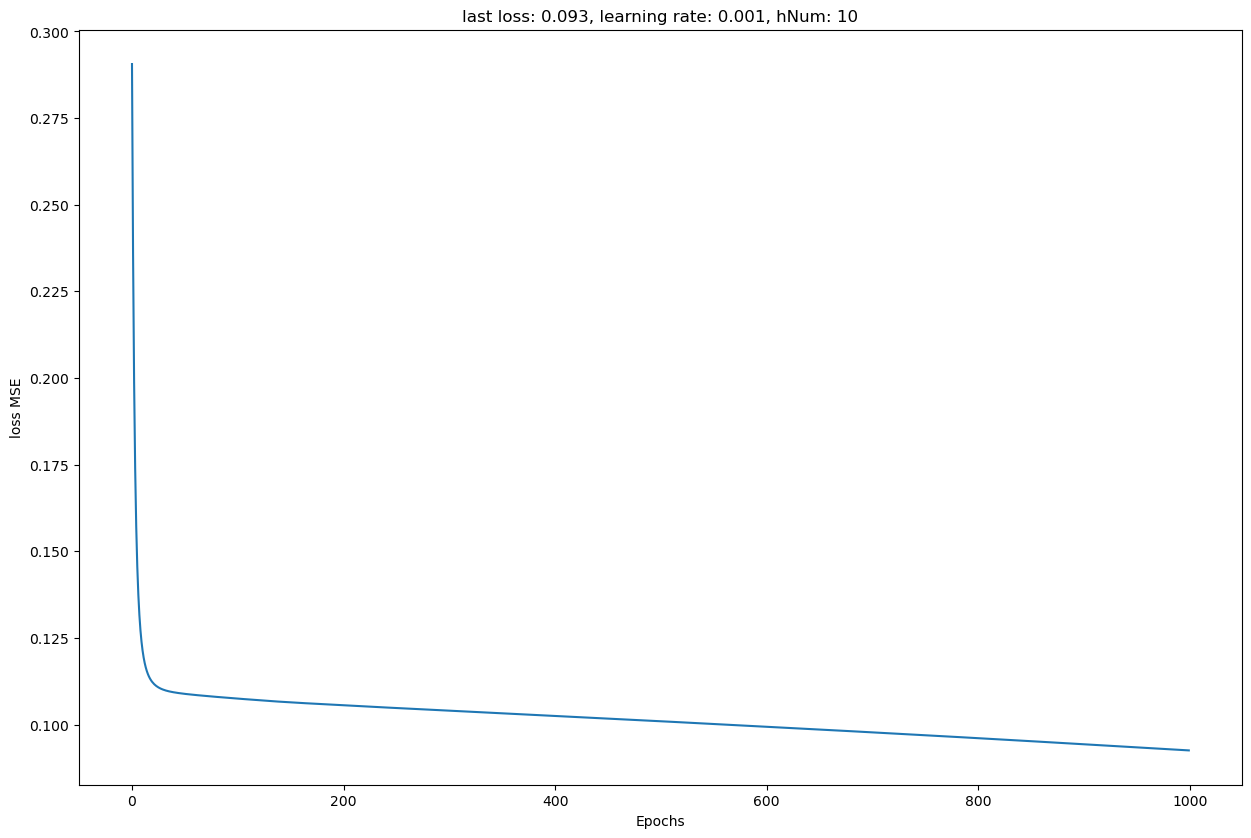

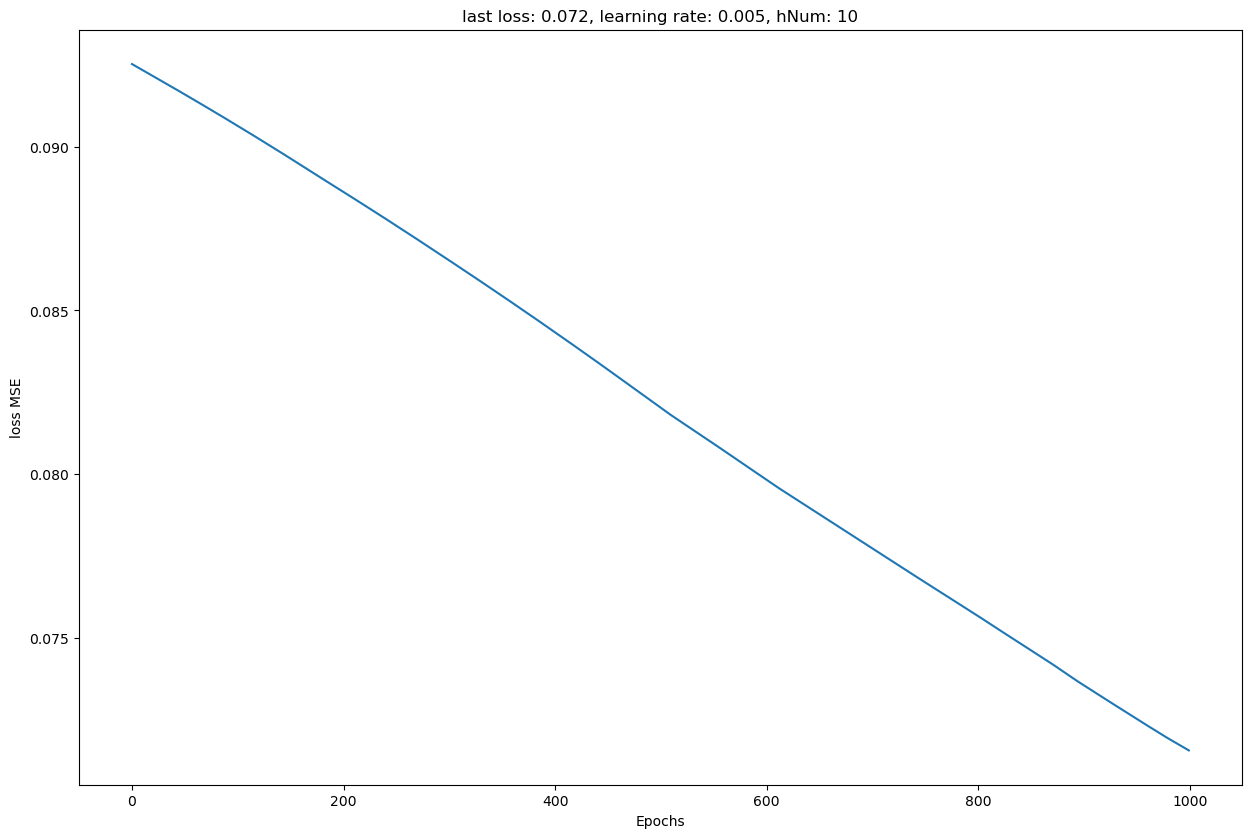

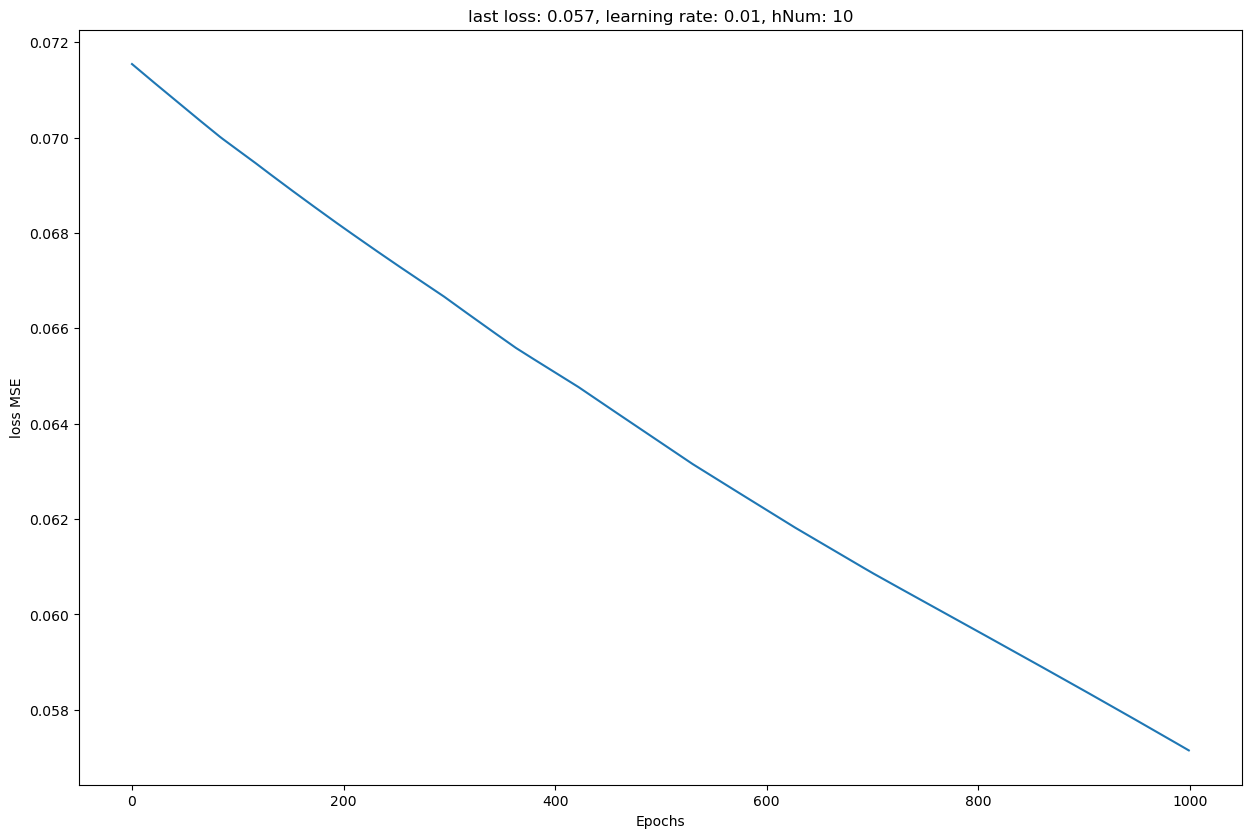

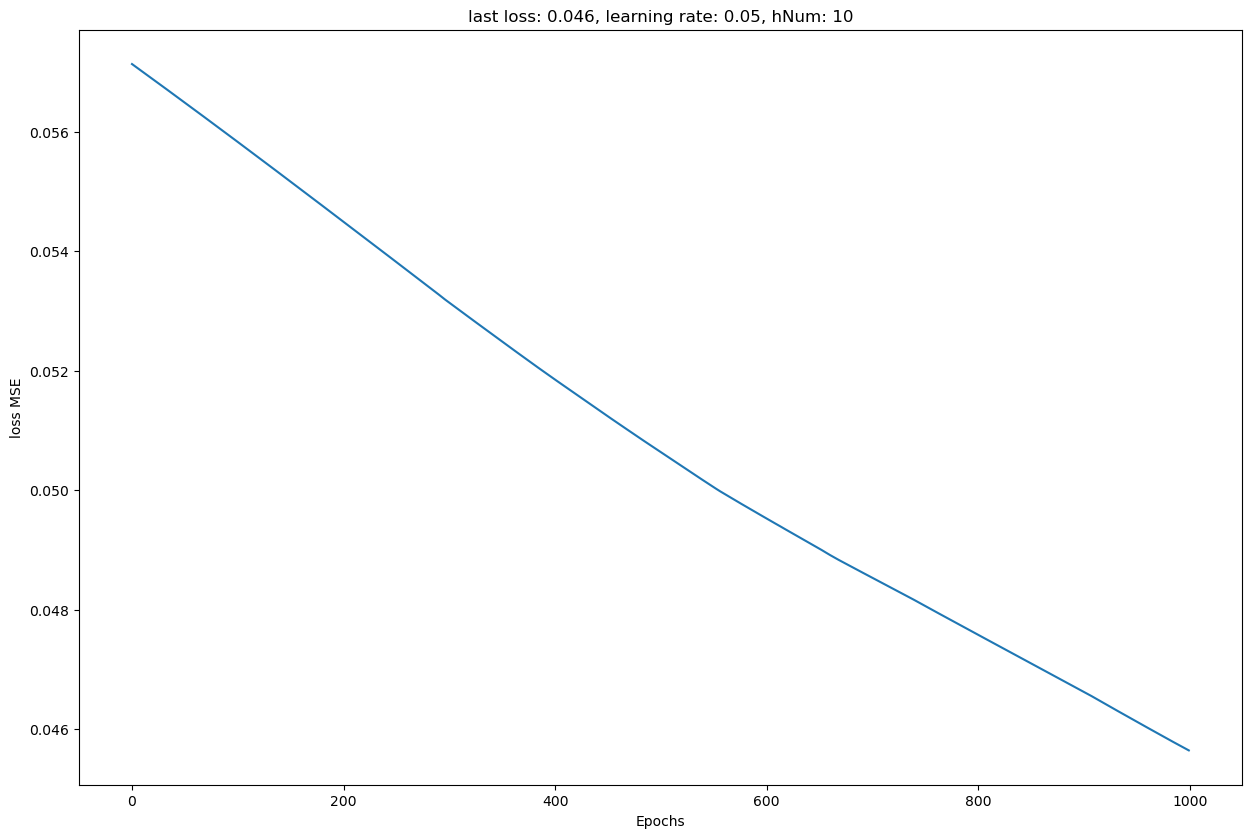

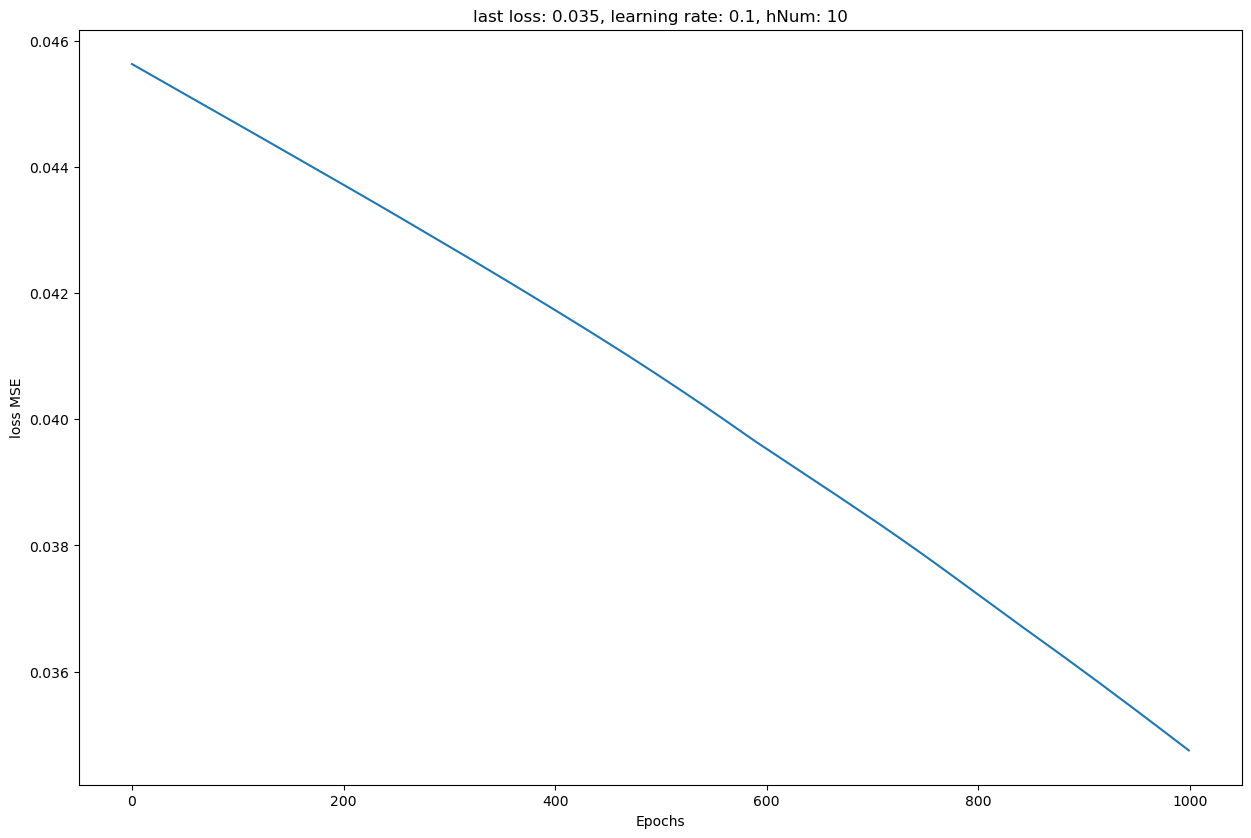

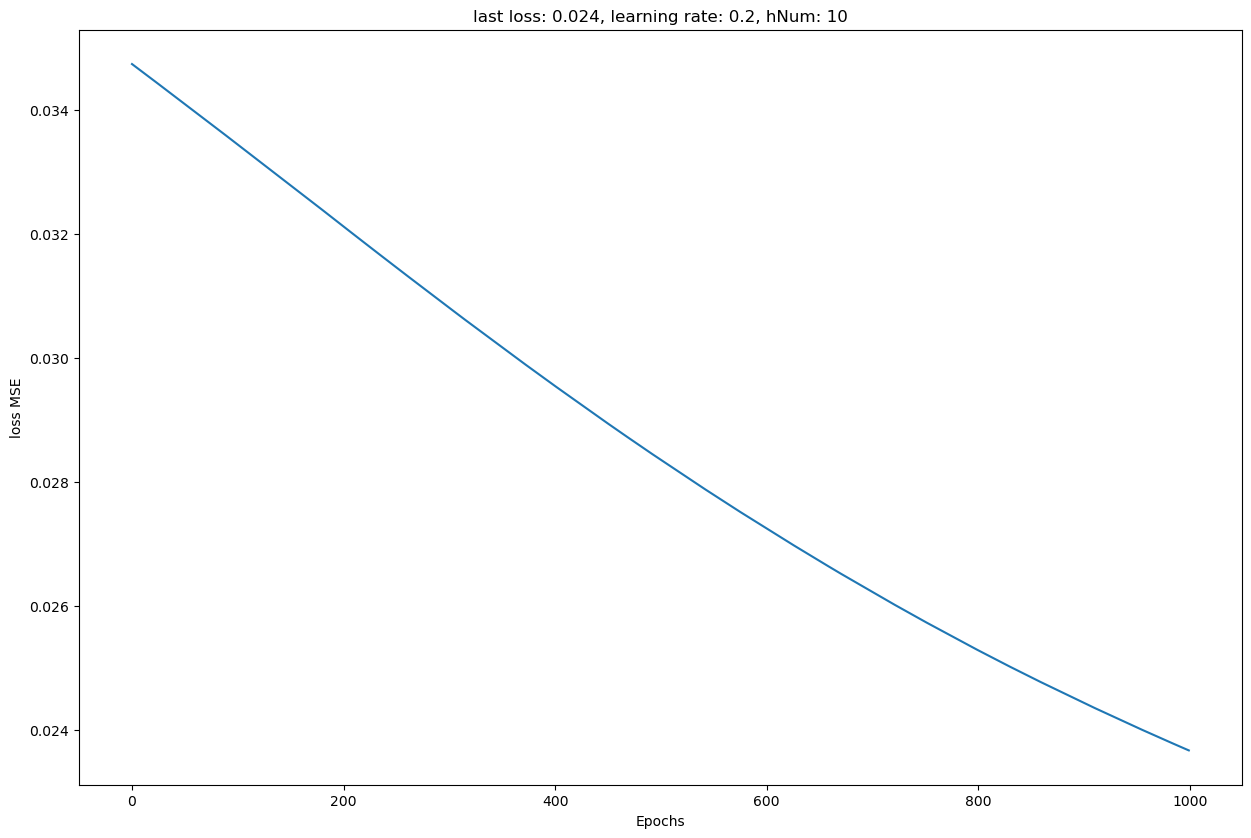

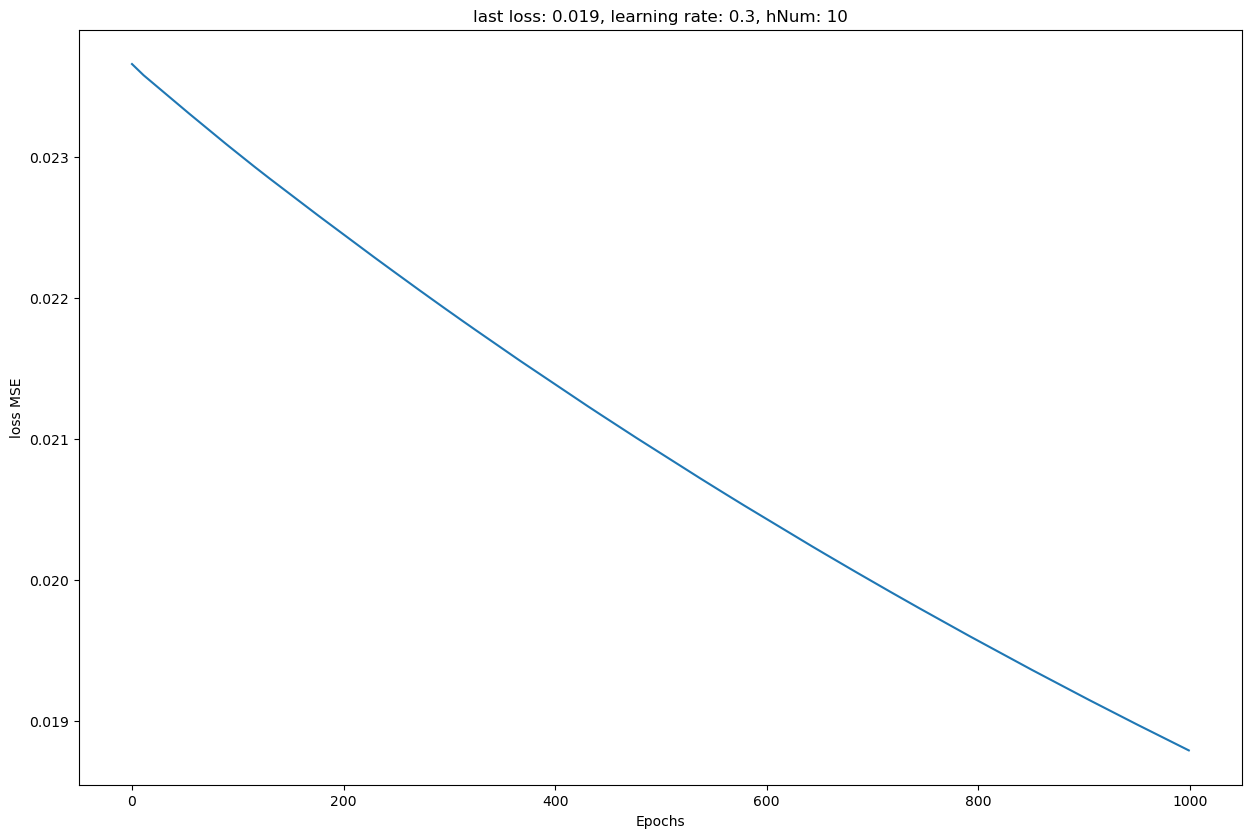

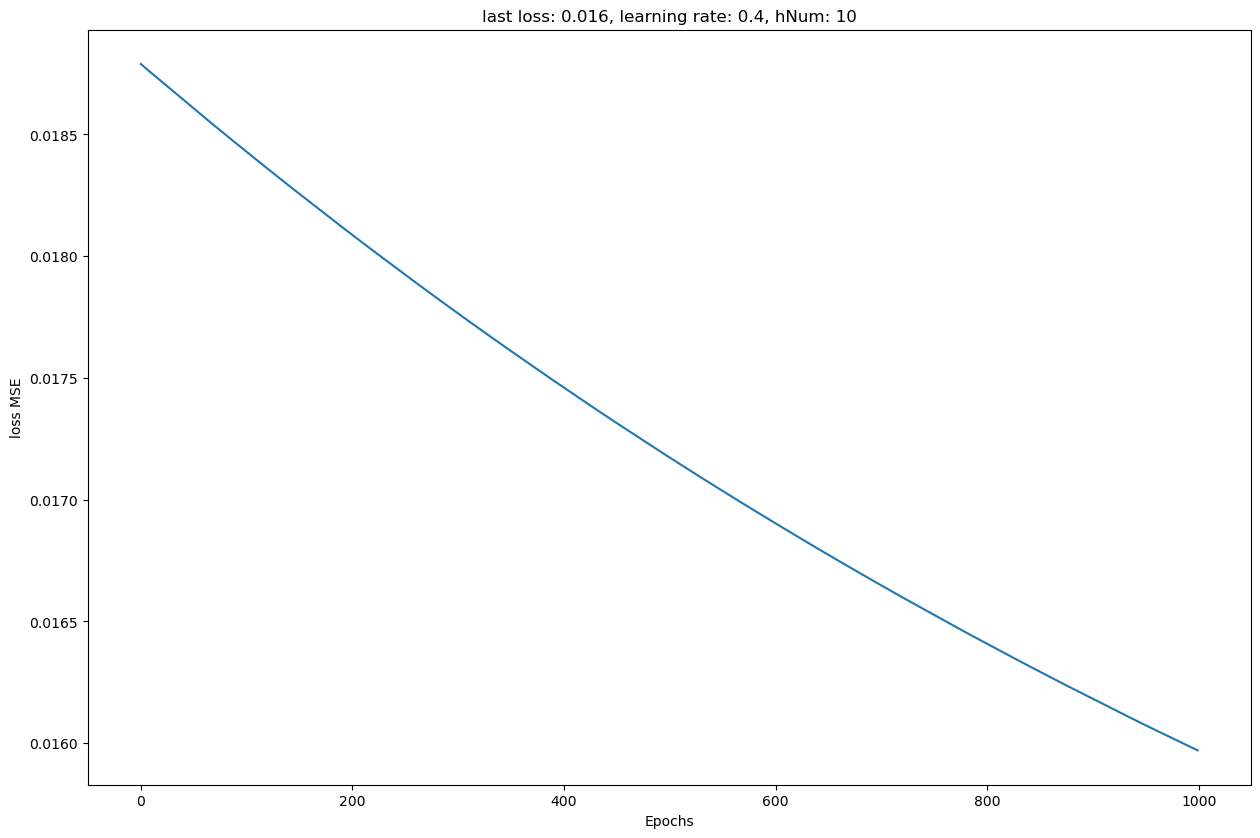

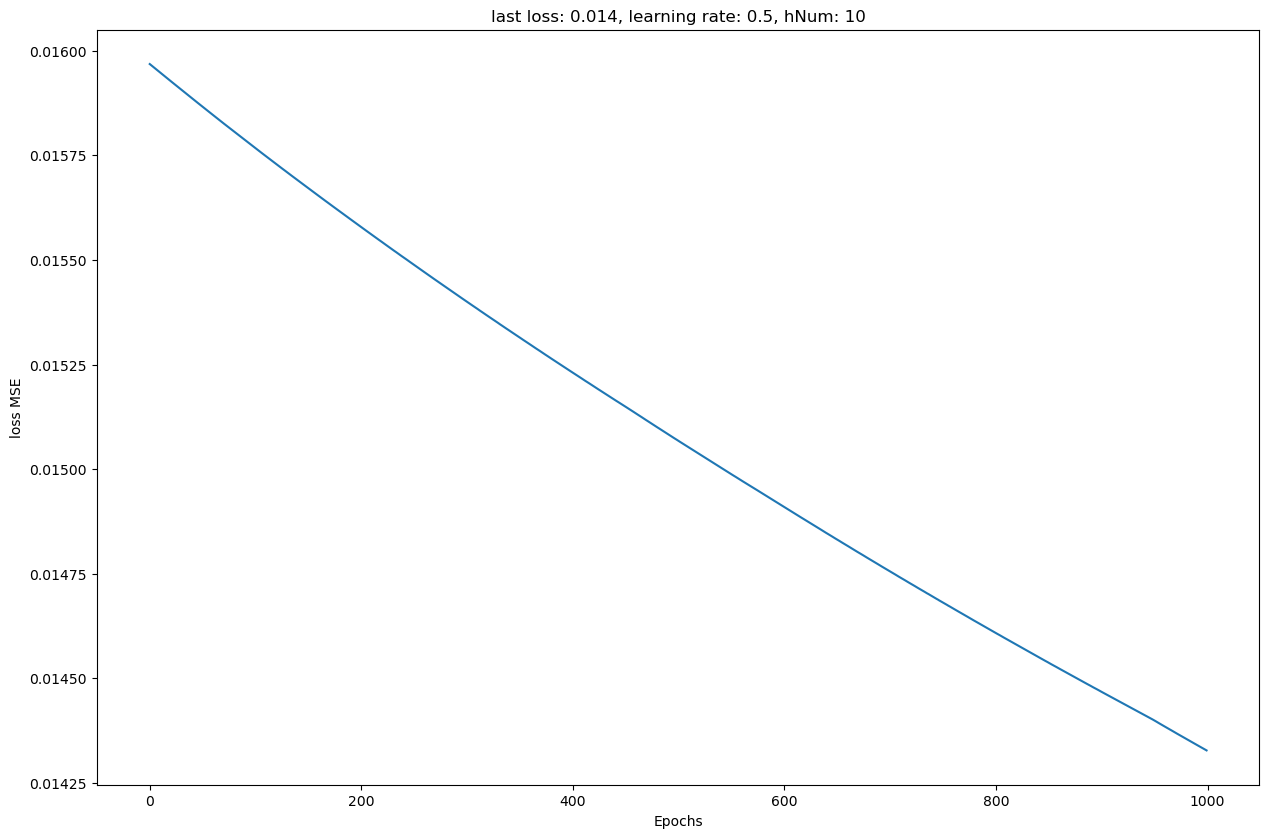

In [51]:
for lr in LR_list:
    loss_plotter(tragedy,
                 X_train,
                 y_train,
                 epochsNum=1000,
                 hNum=10,
                 learning_rate=lr)

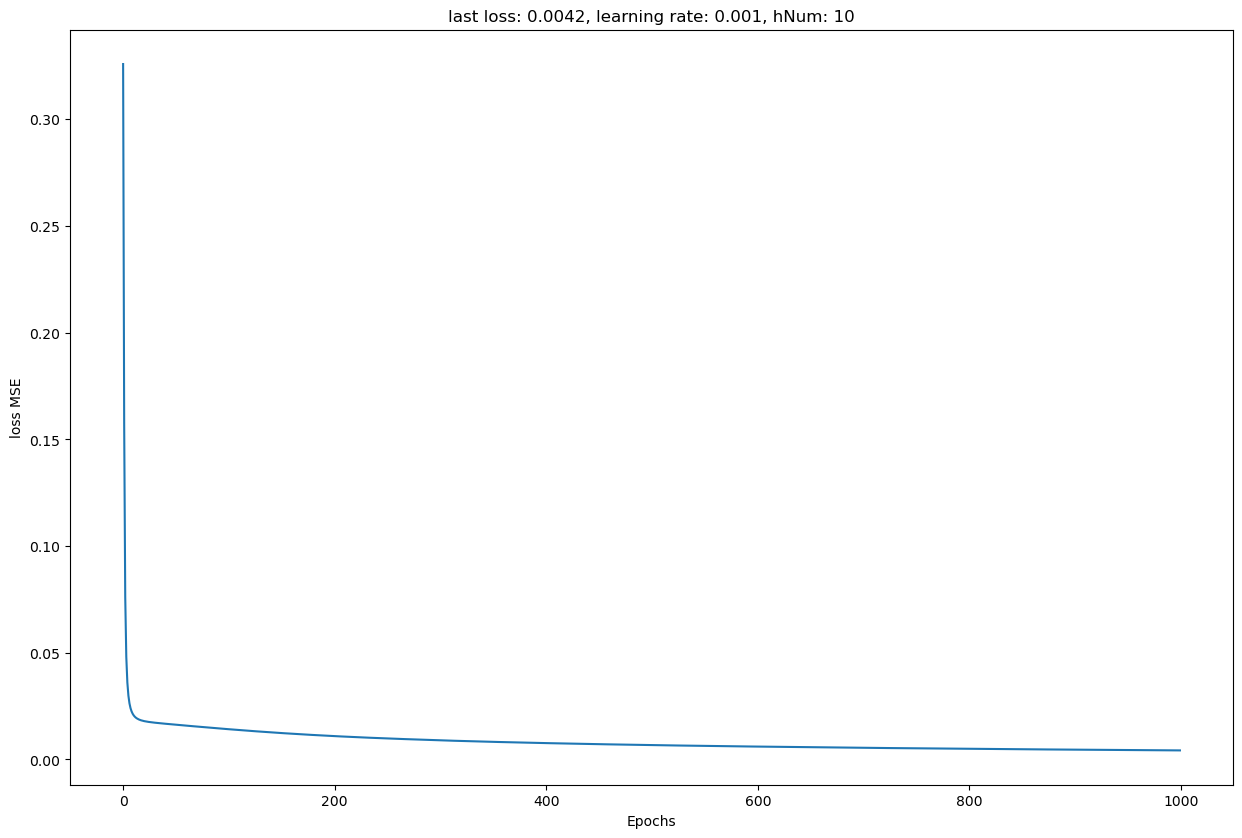

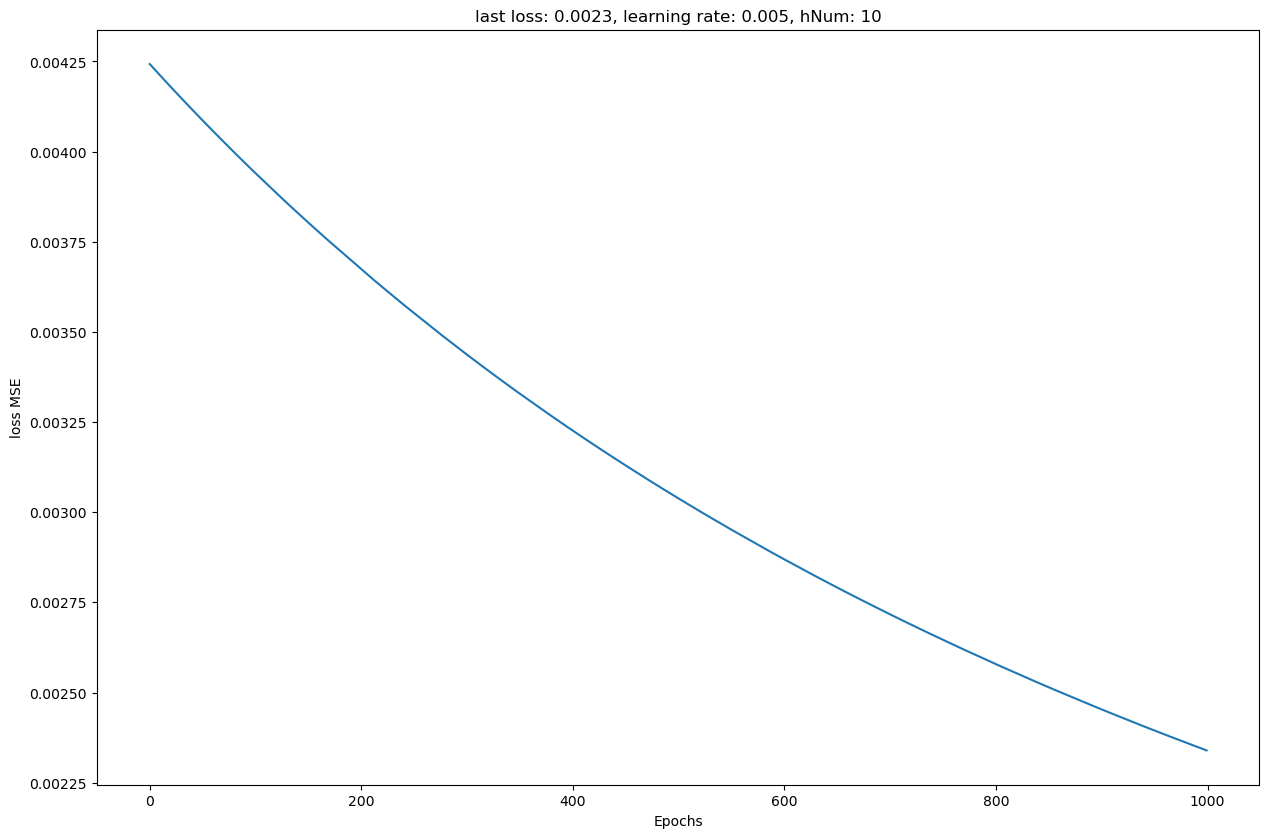

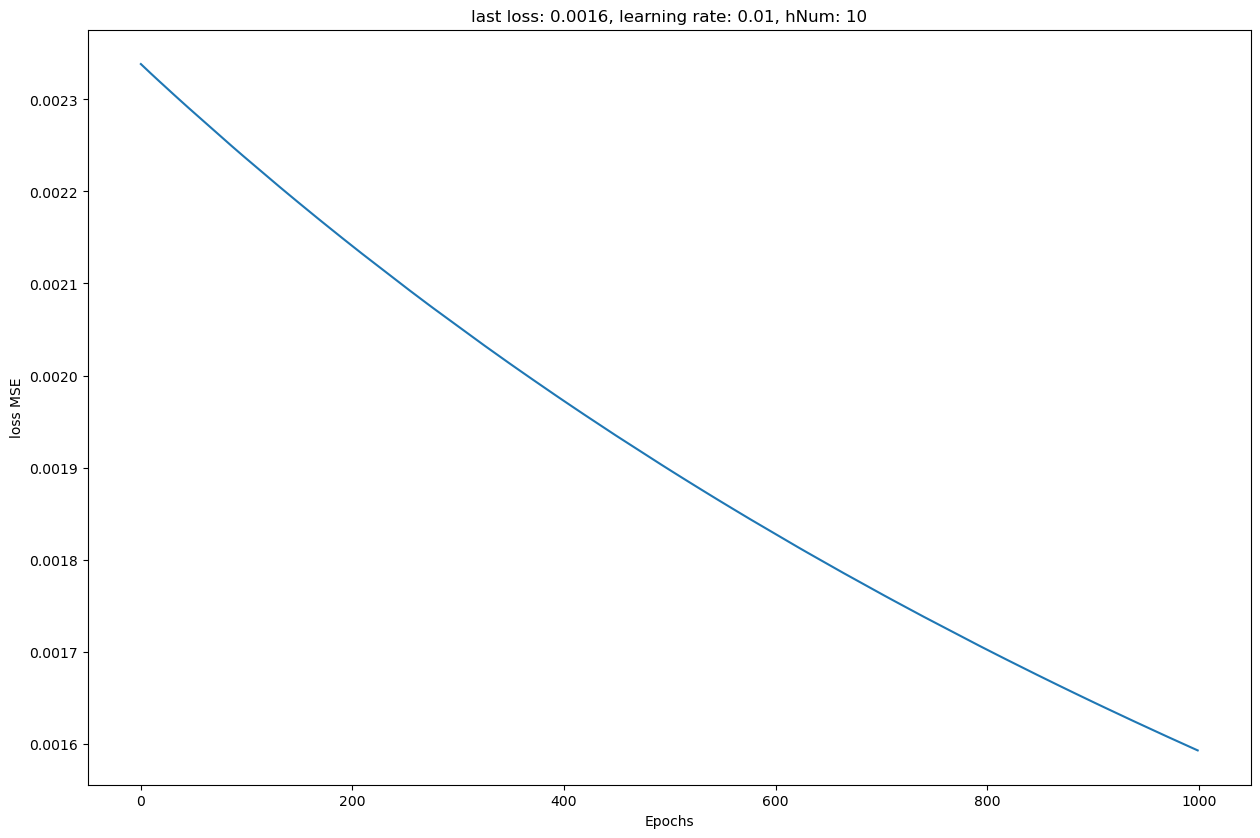

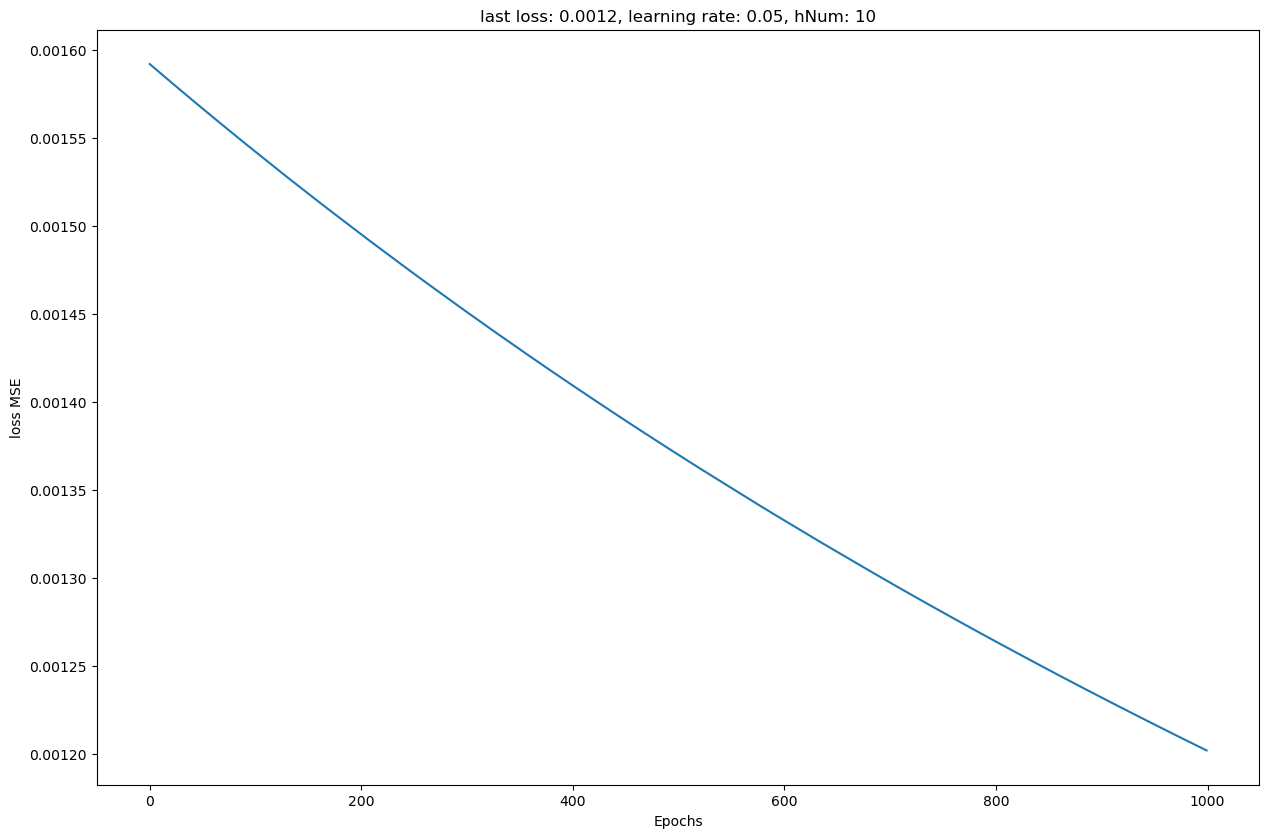

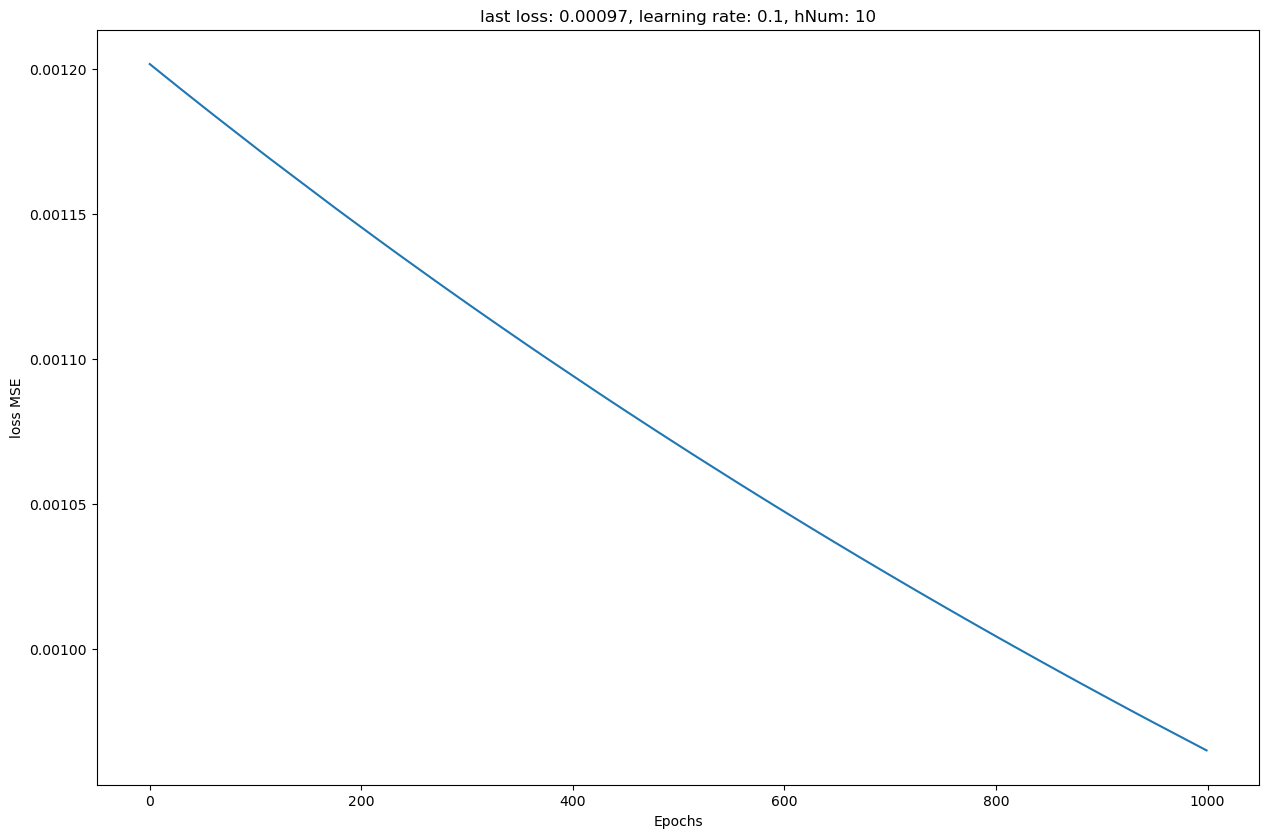

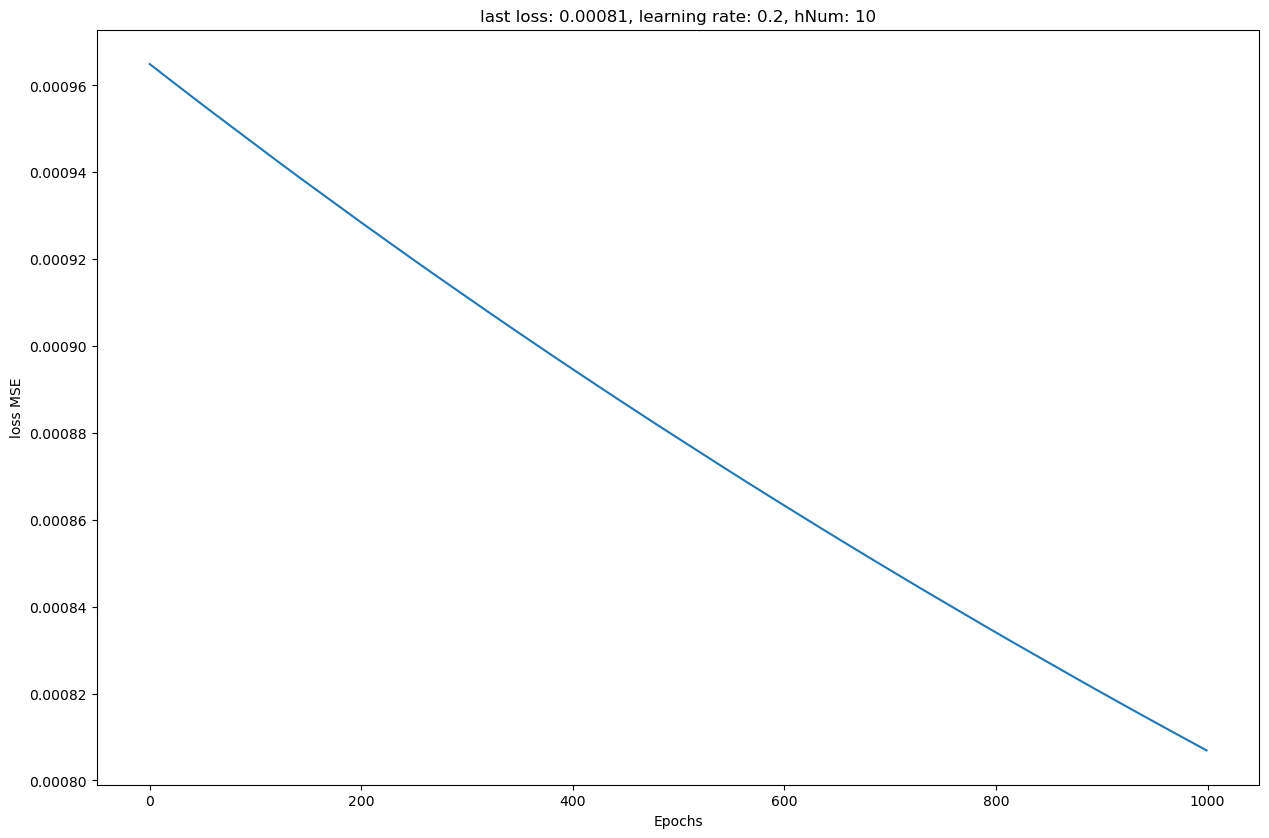

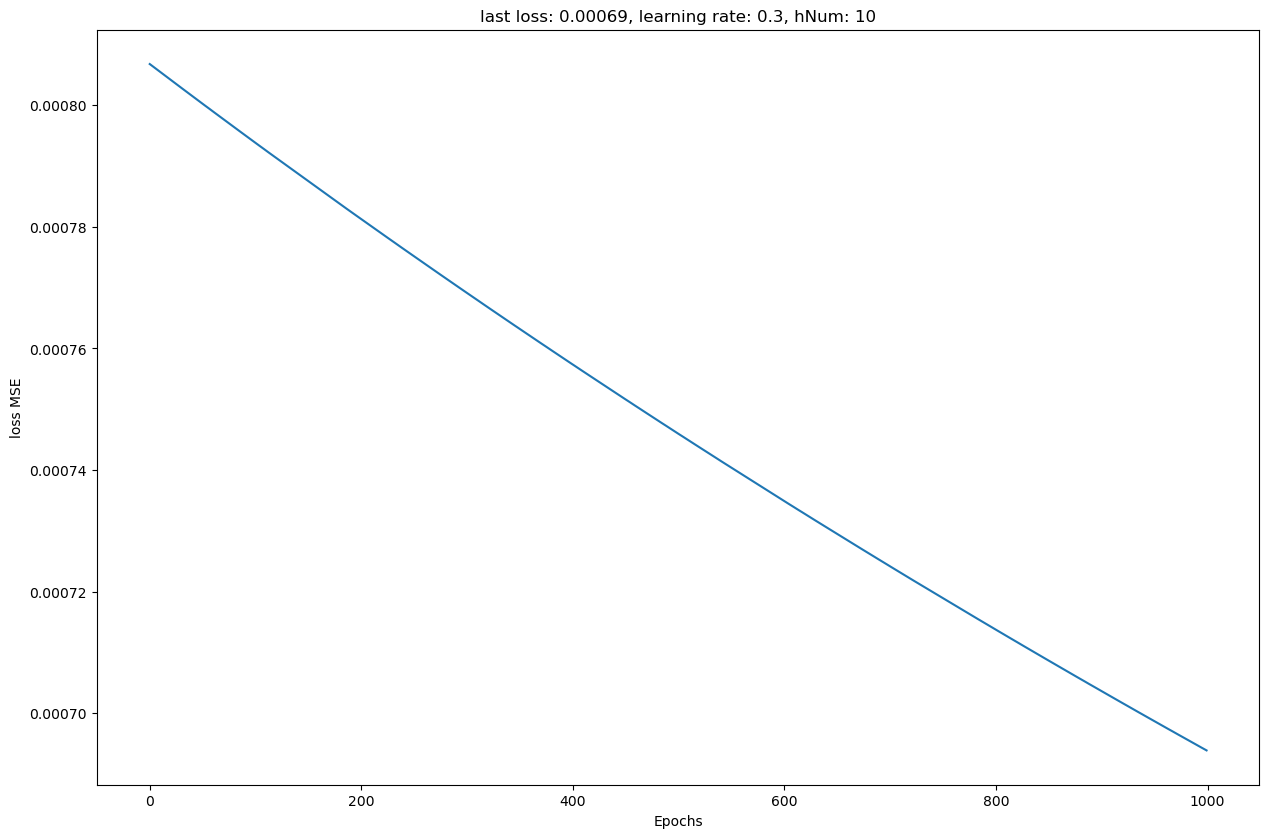

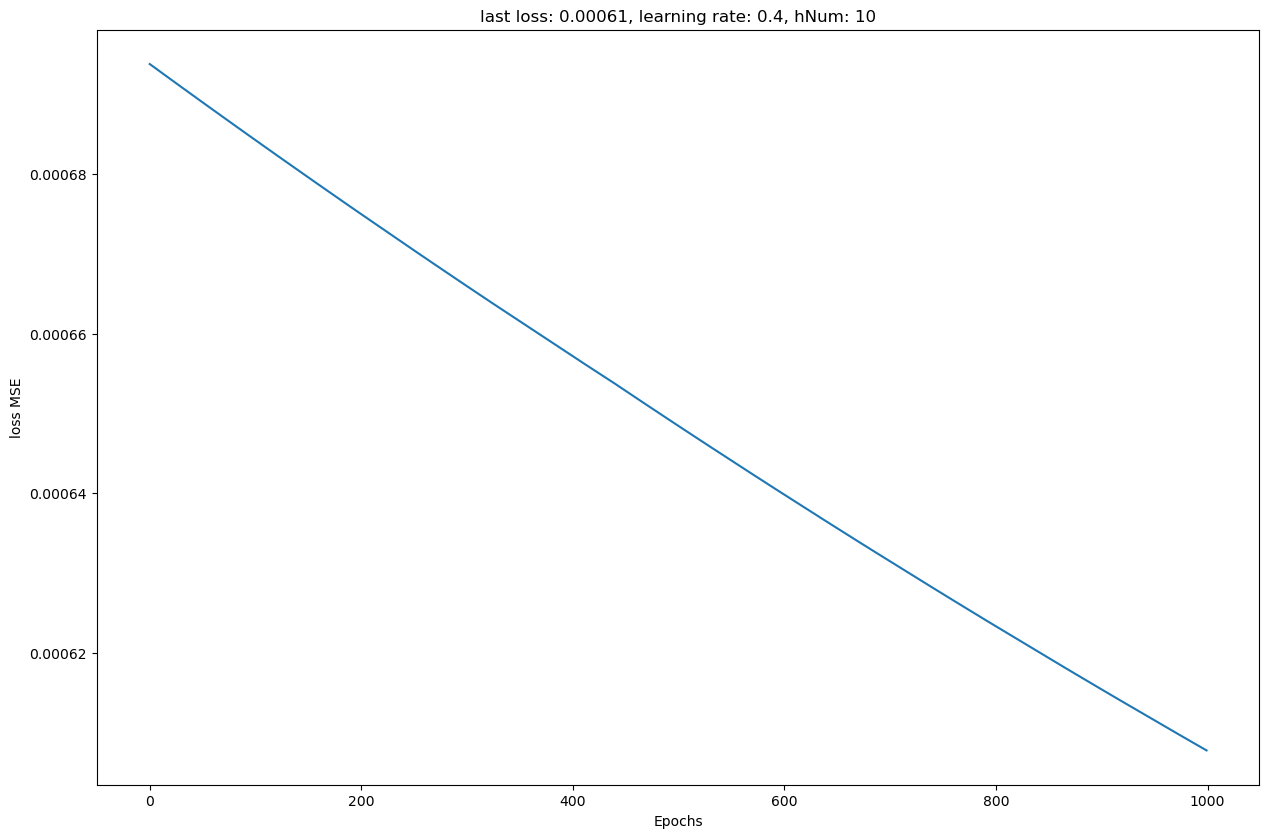

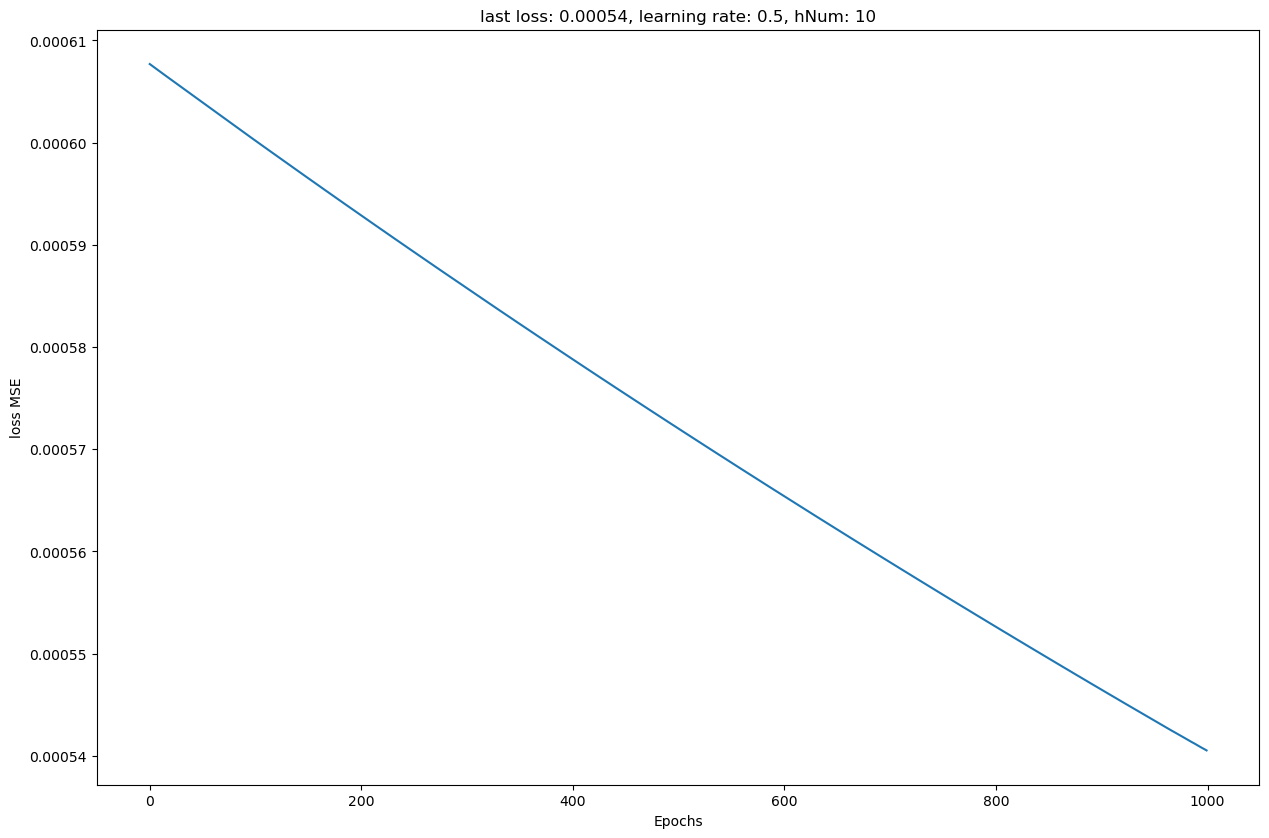

In [52]:
for lr in LR_list:
    loss_plotter(tragedy,
                 X_test,
                 y_test,
                 epochsNum=1000,
                 hNum=10,
                 learning_rate=lr)

Zbiór treningowy: z wykresów widać, że błąd spada wraz ze wzrostem l_r, może nieco stabilizuje się od lr = 0.1 albo 0.2. Pierwsze epoki uczą najszybciej; później nie widać znaczących zmian.<br>
Zbiór testowy: ostateczny błąd jest zasadniczo jednakowy i jest zawsze mniejszy niż dla danych treningowych. Jego wartosć jest pomijalnie mała.<br>
Stwierdzając subiektywnie, że błąd jest akceptowaly przy lr = 0.1, z tą wartością sprawdzę jak można zoptymalizować ilość neuronów w warstwie ukrytej.

In [62]:
neuron_list = list(range(2,31))

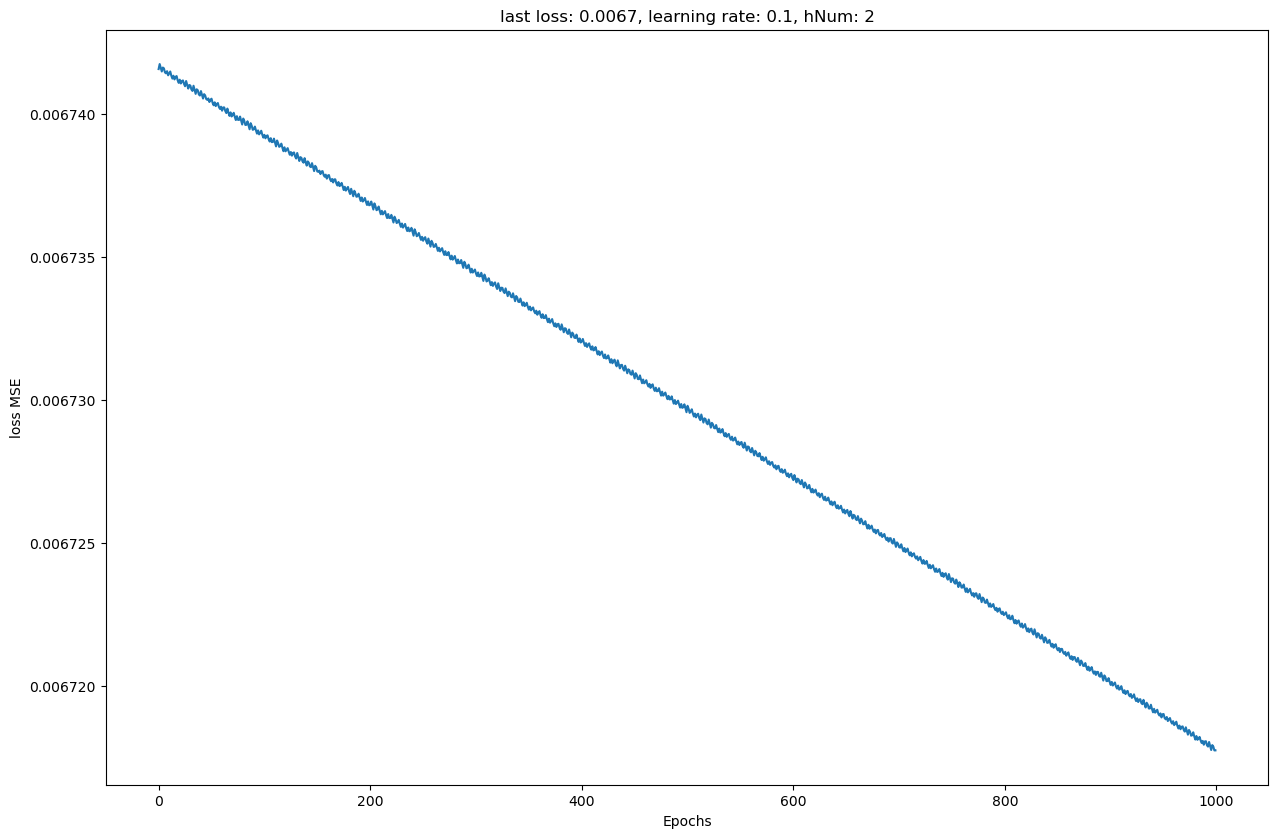

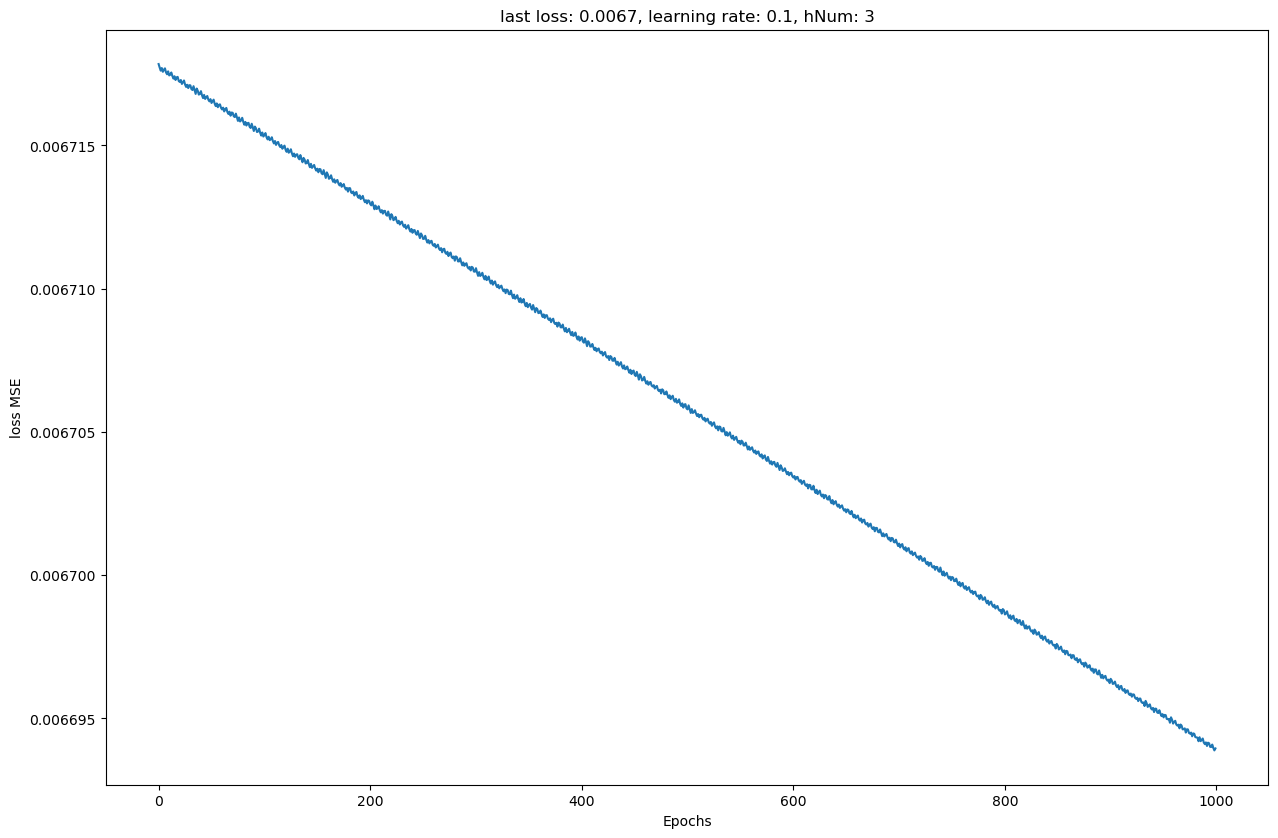

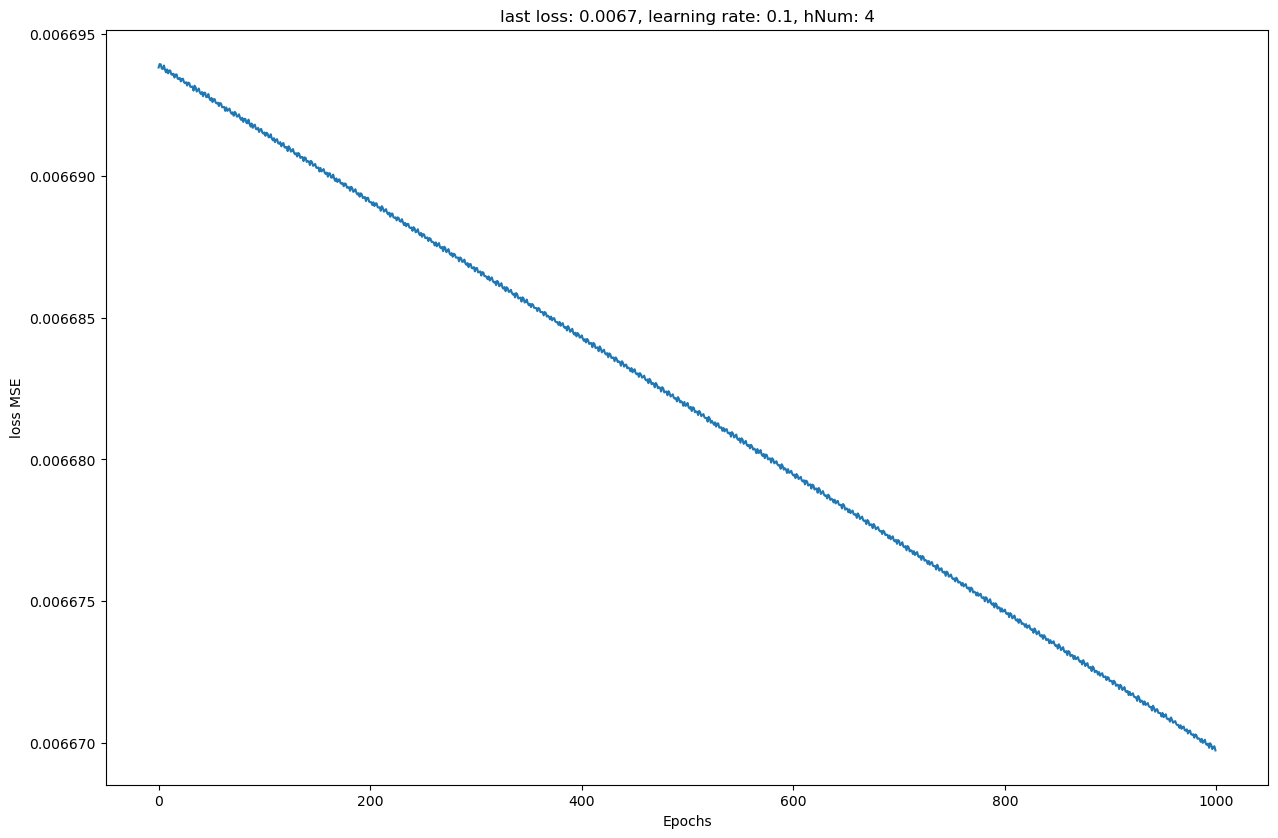

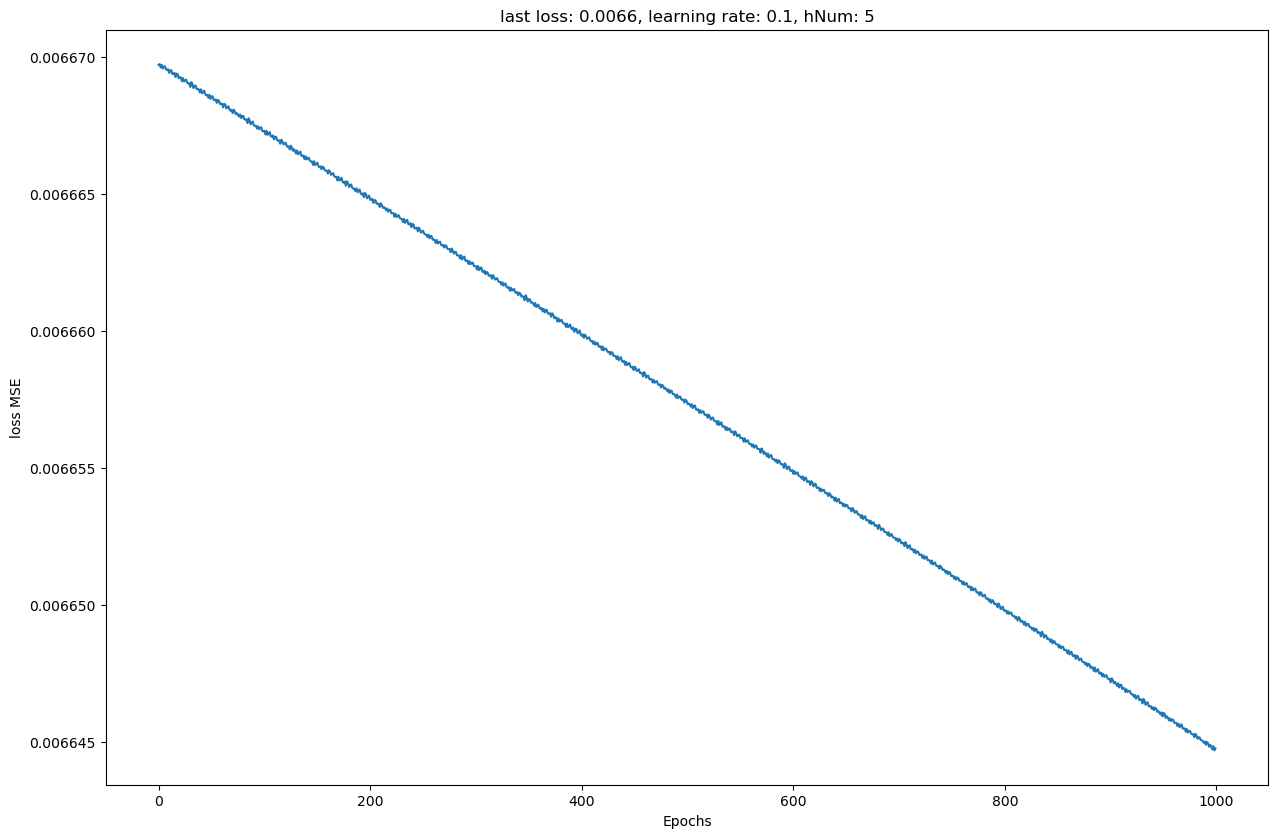

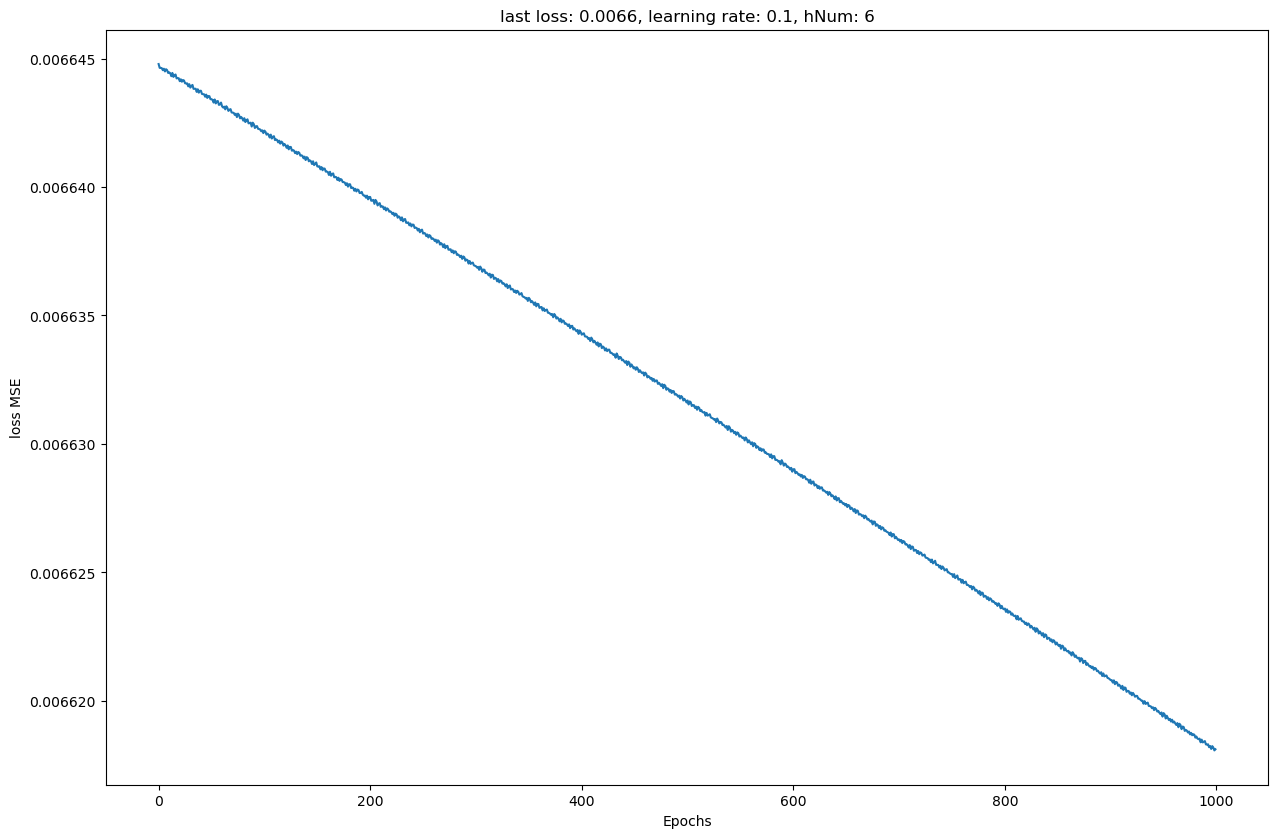

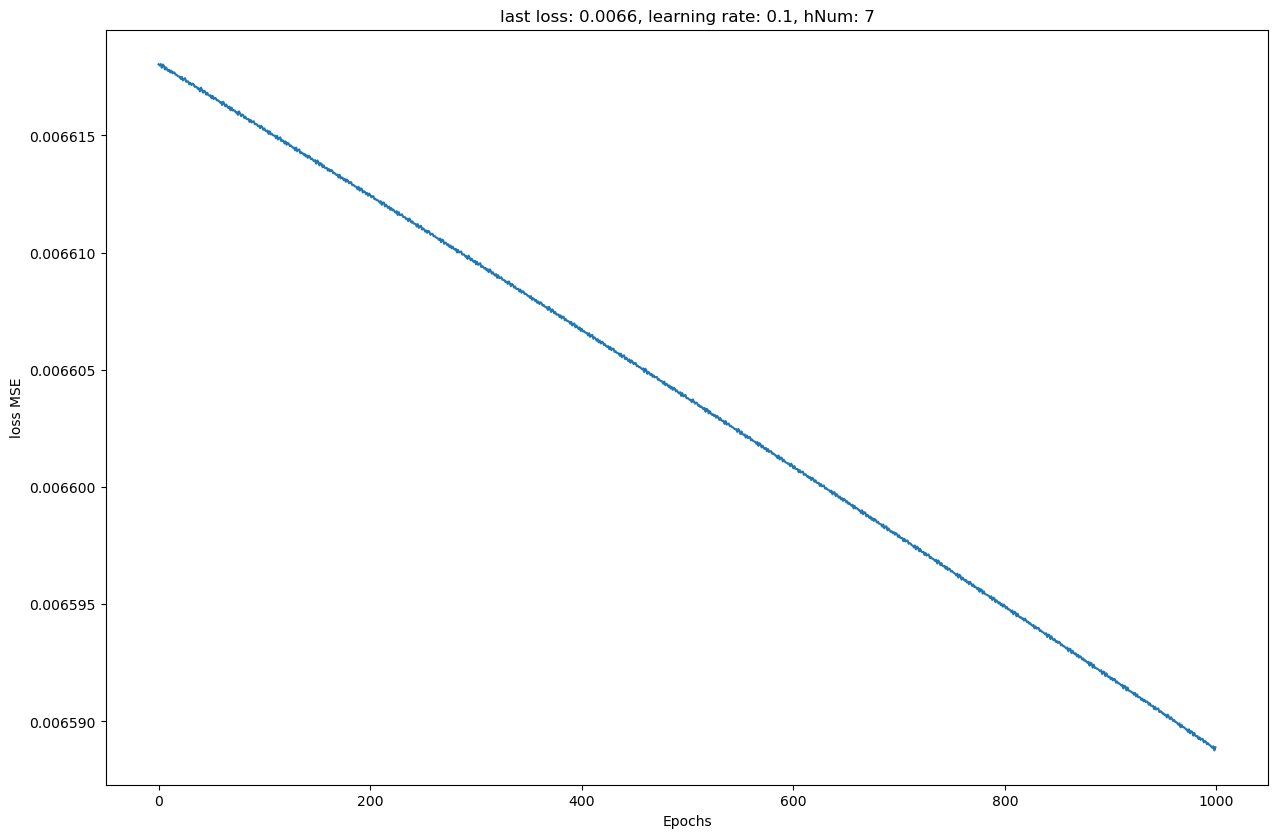

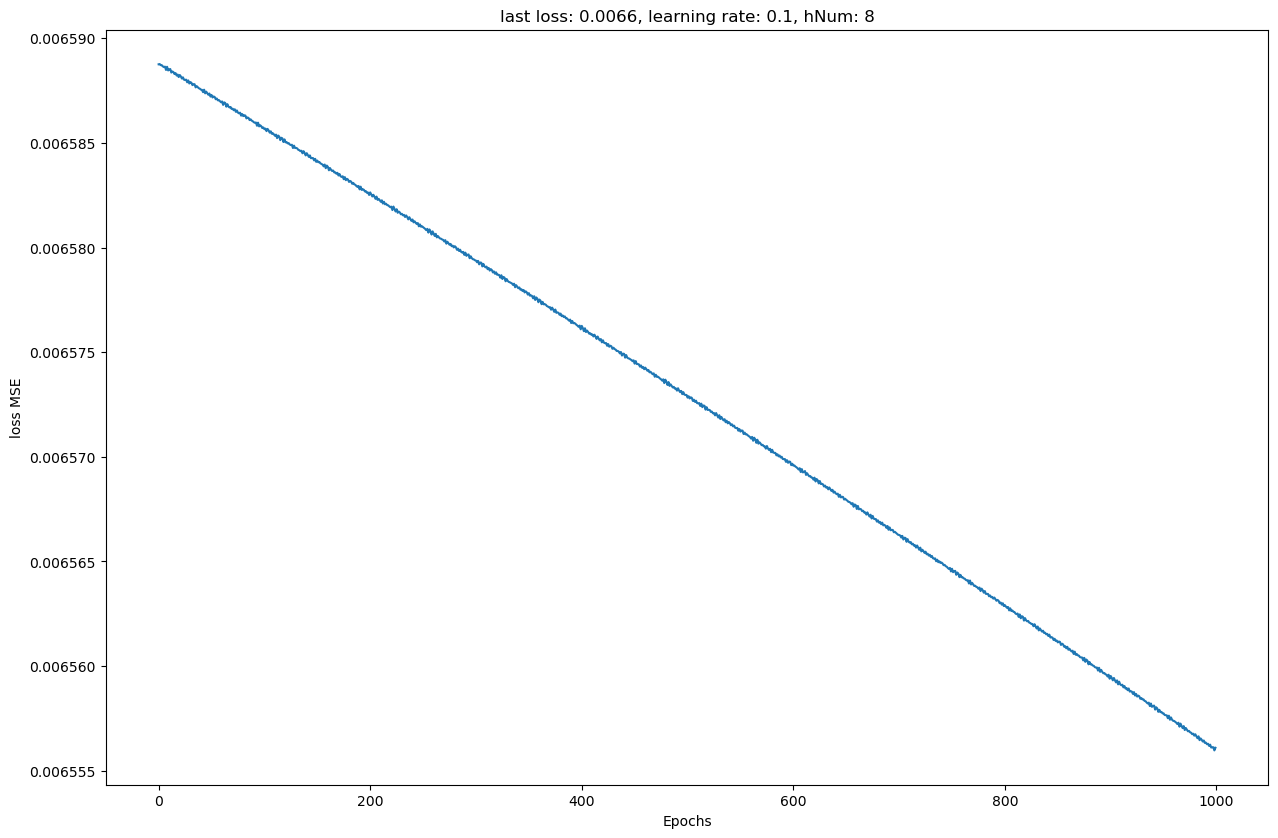

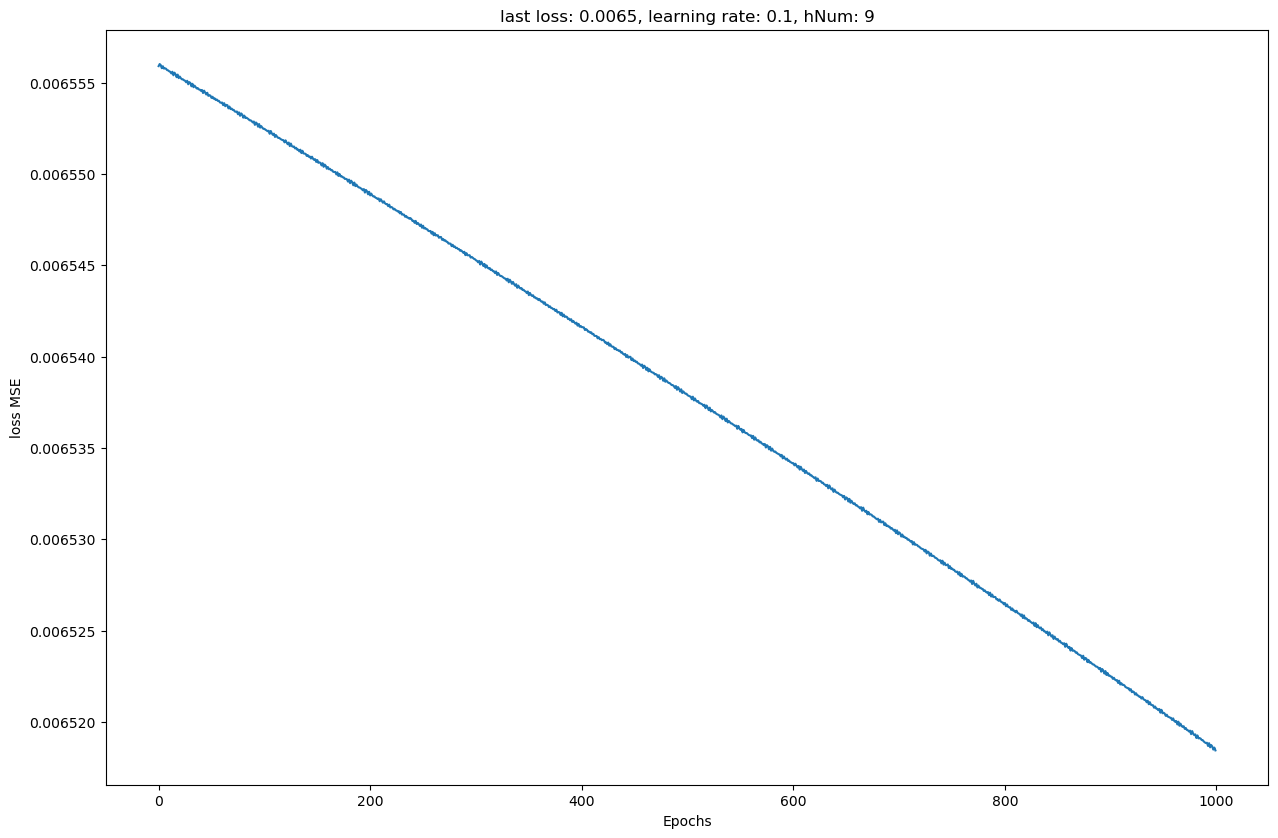

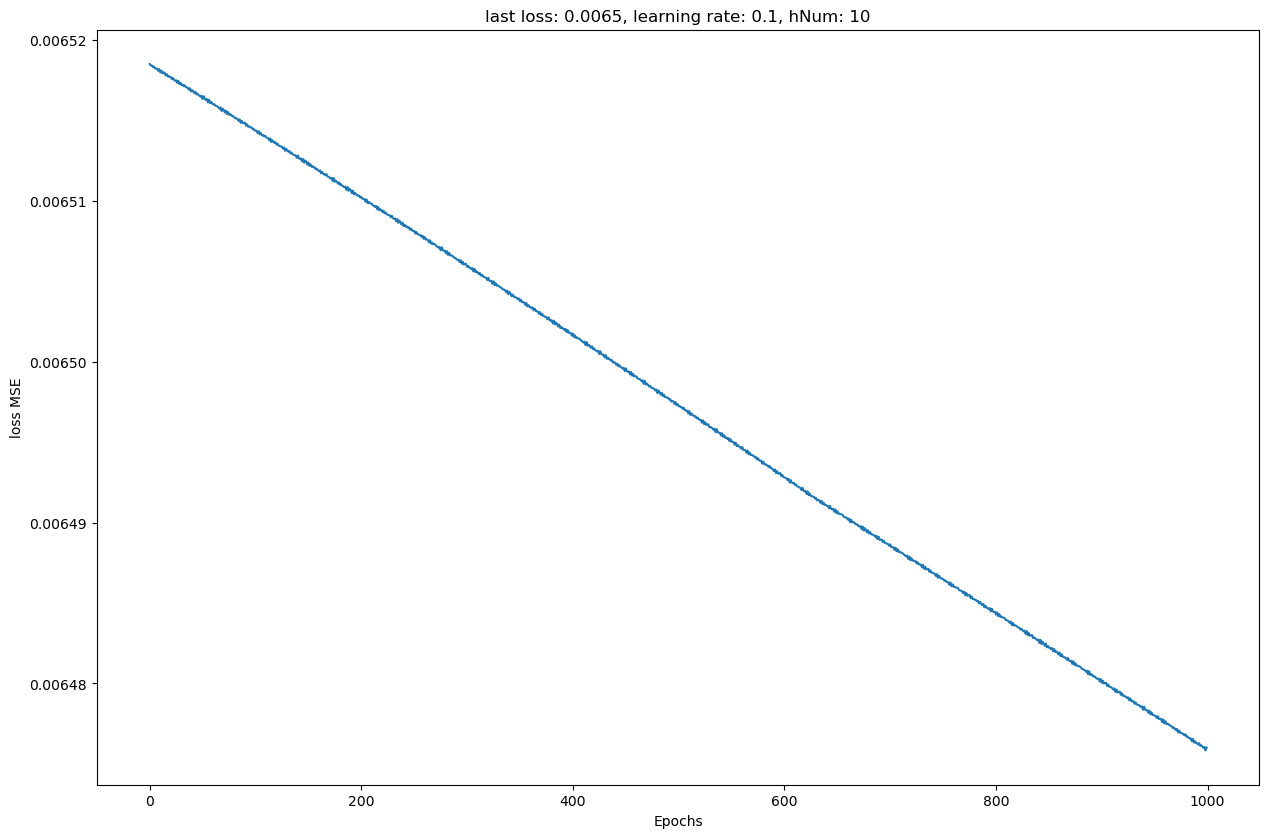

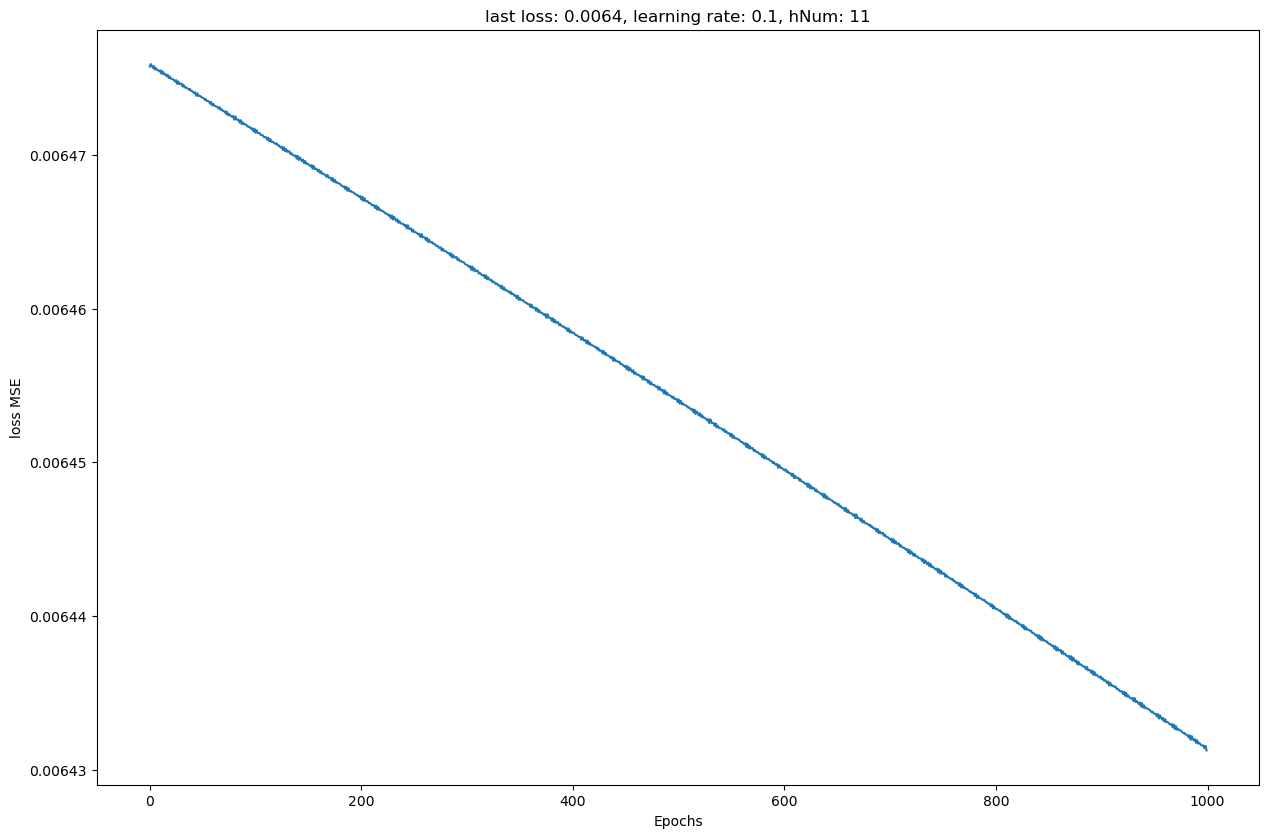

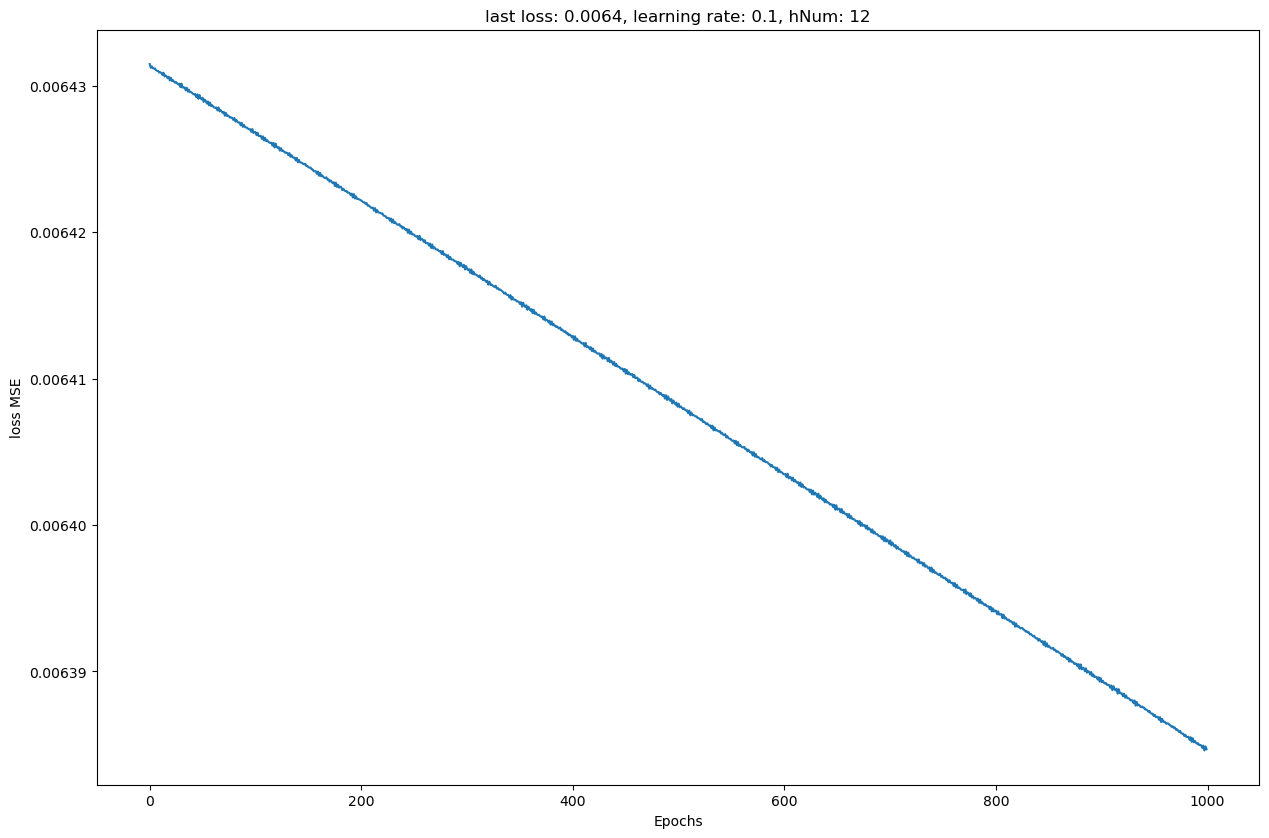

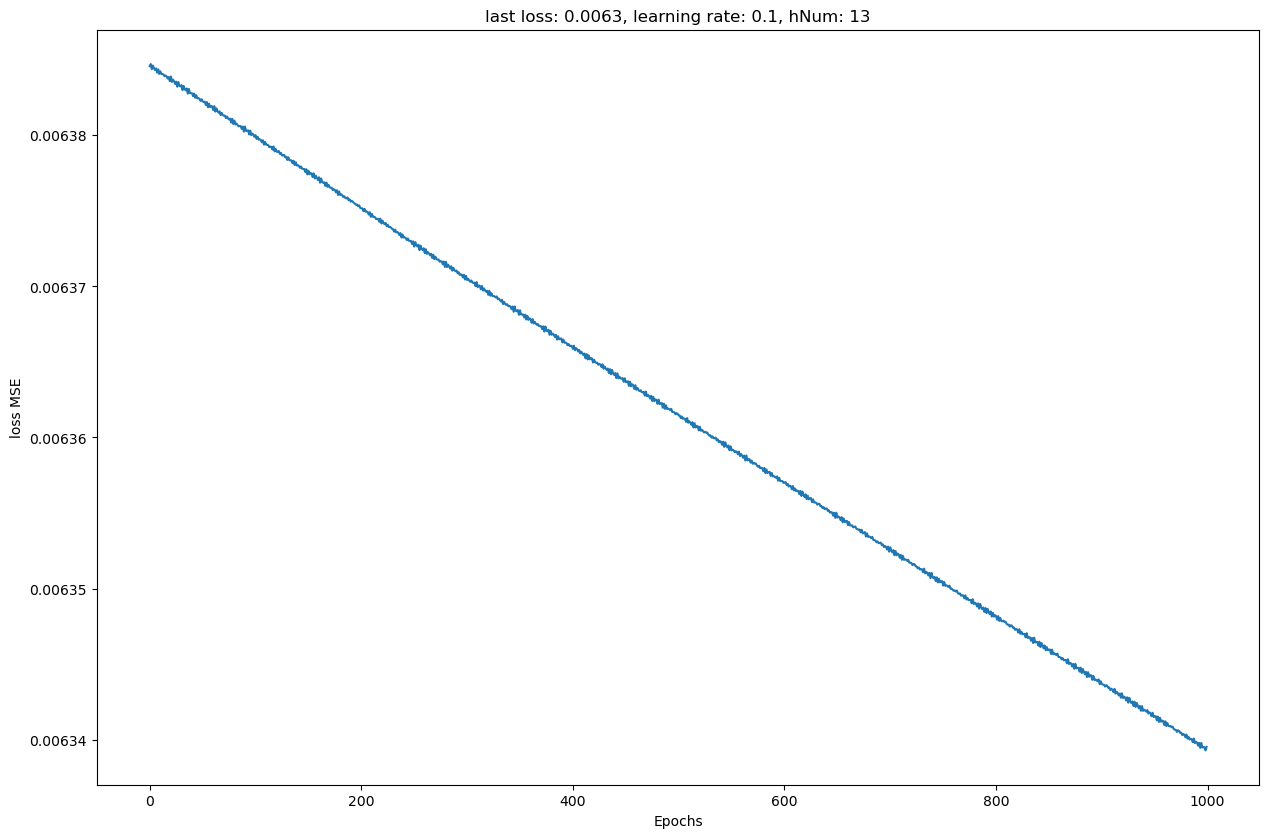

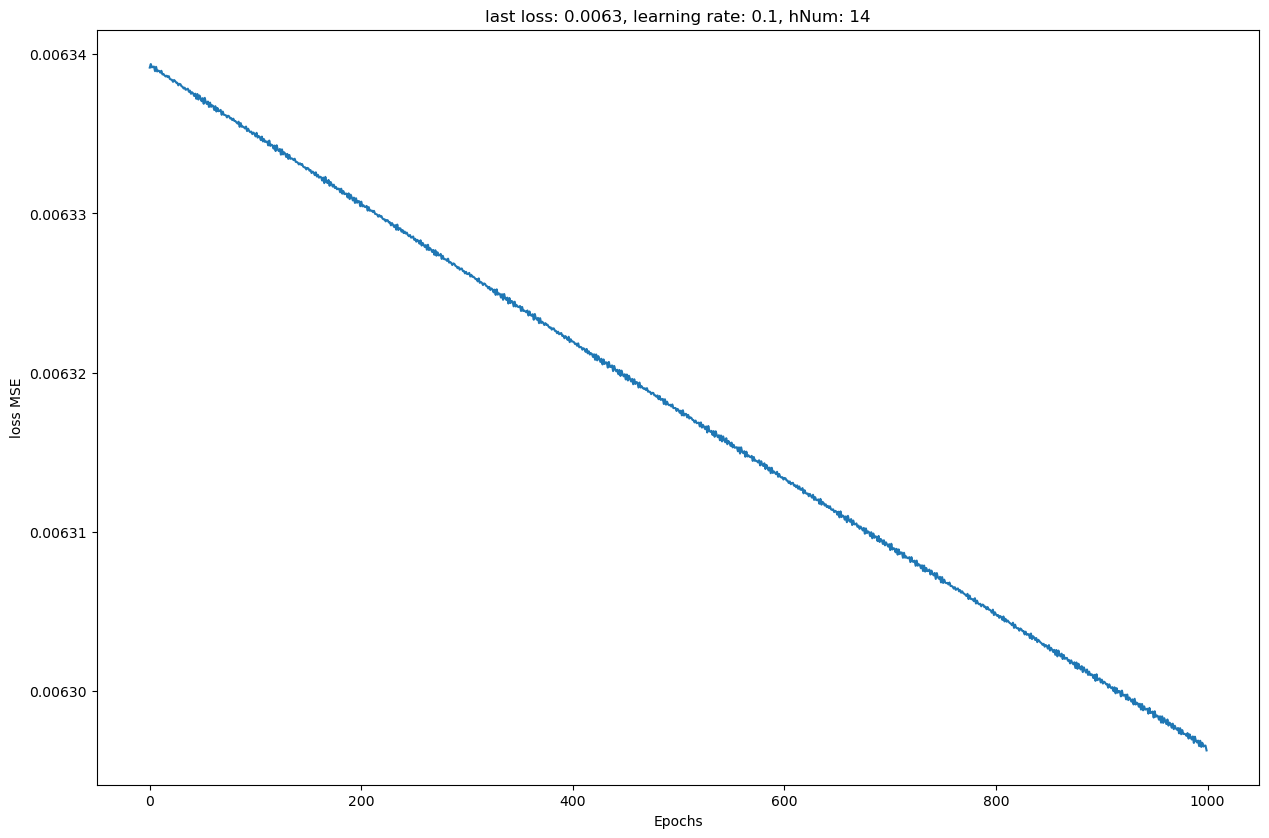

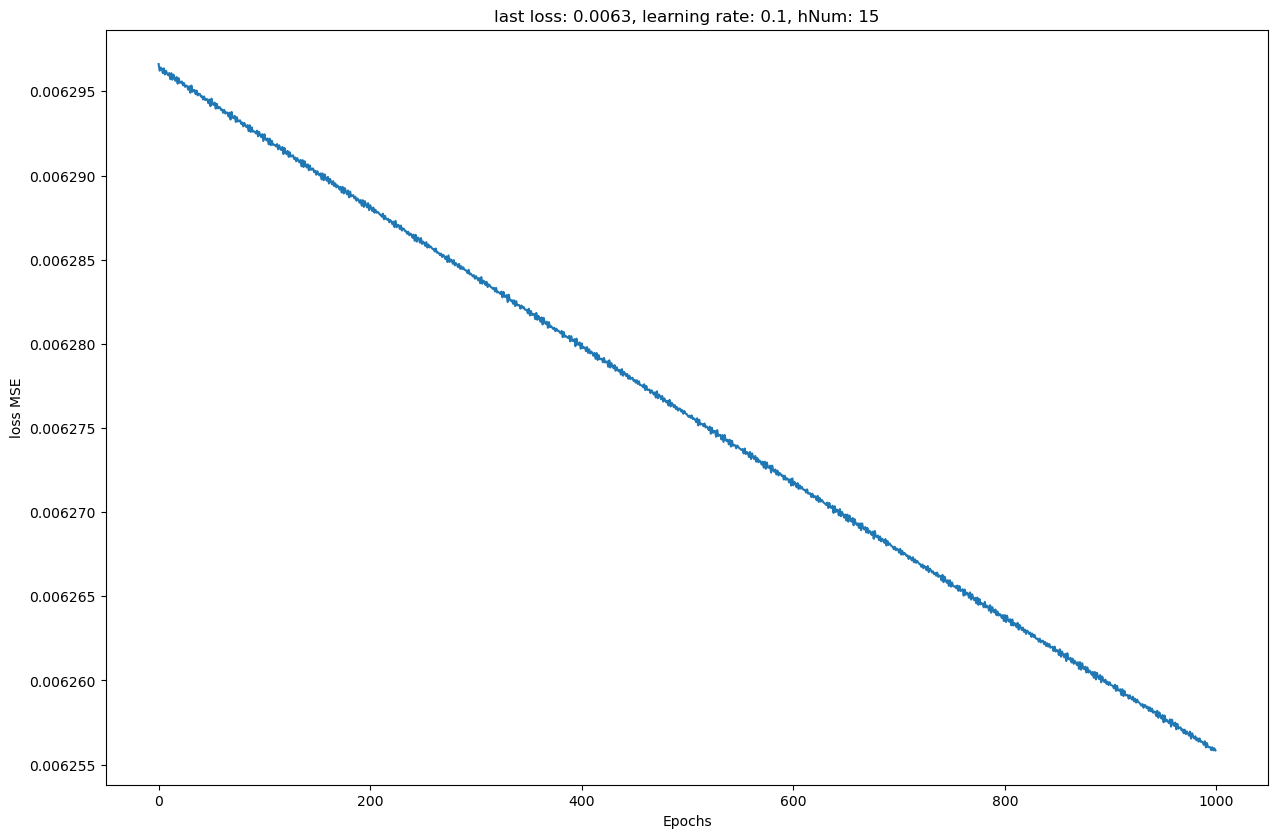

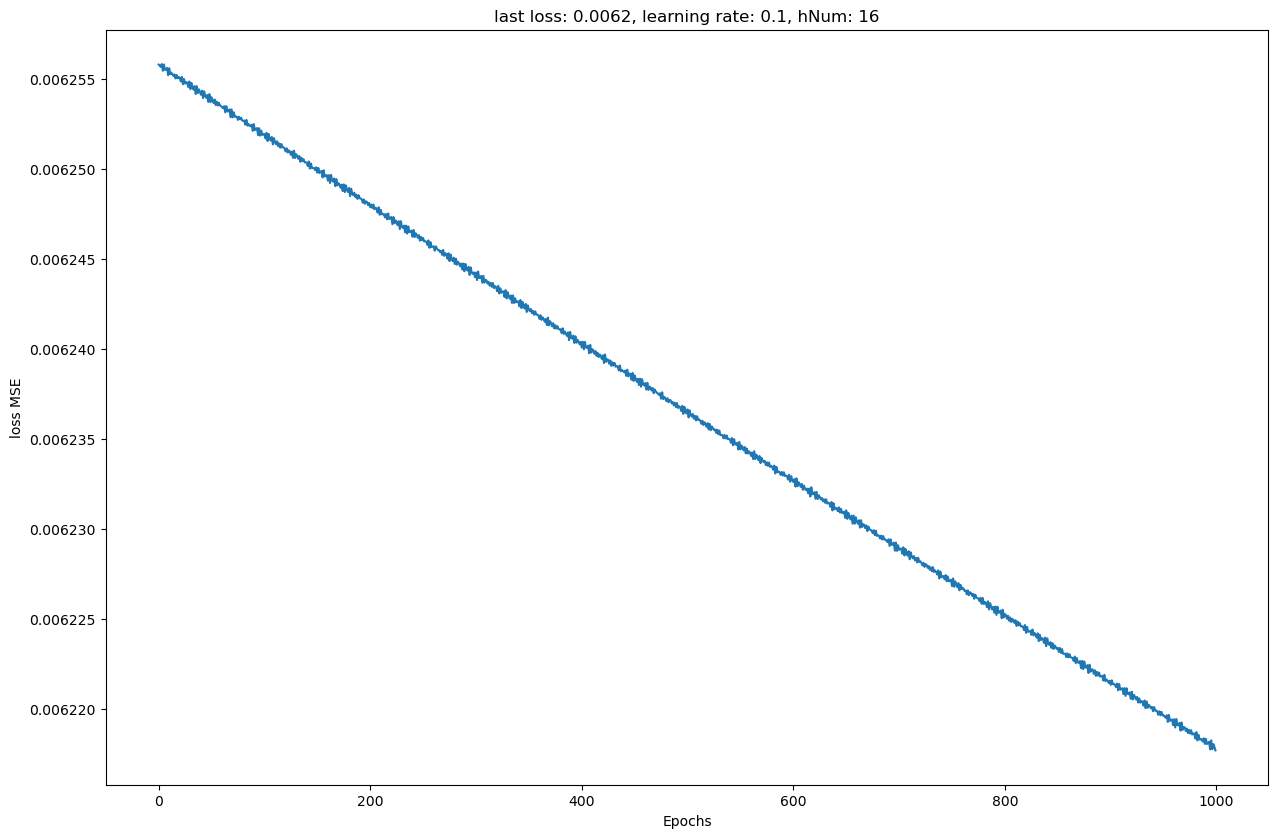

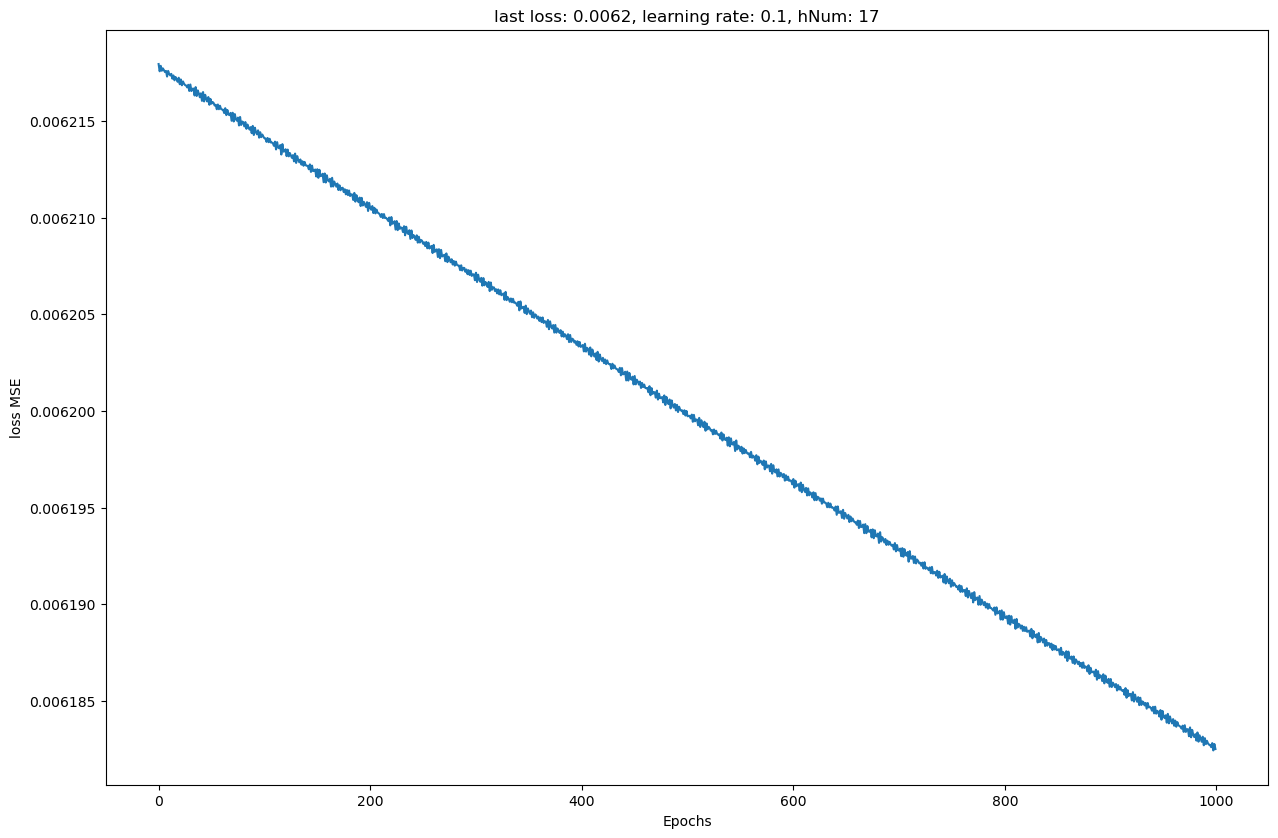

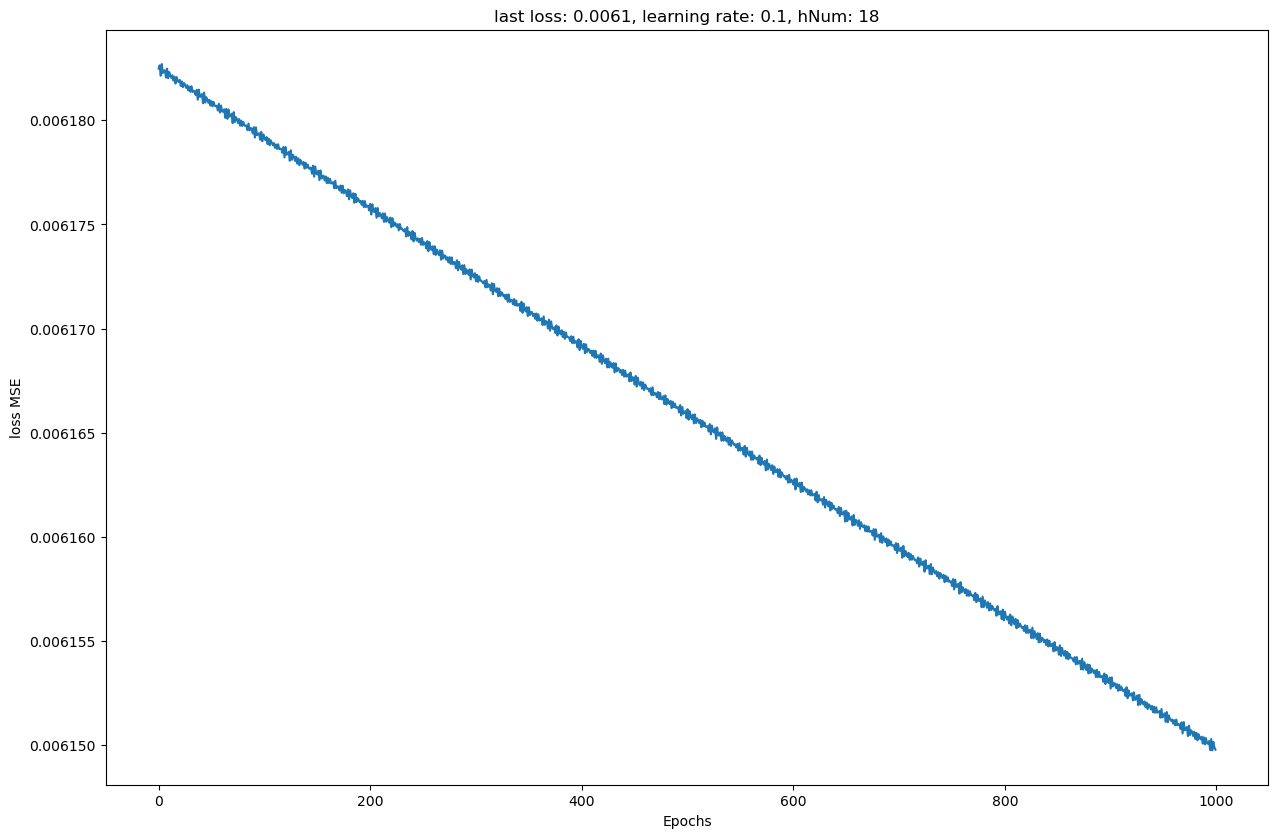

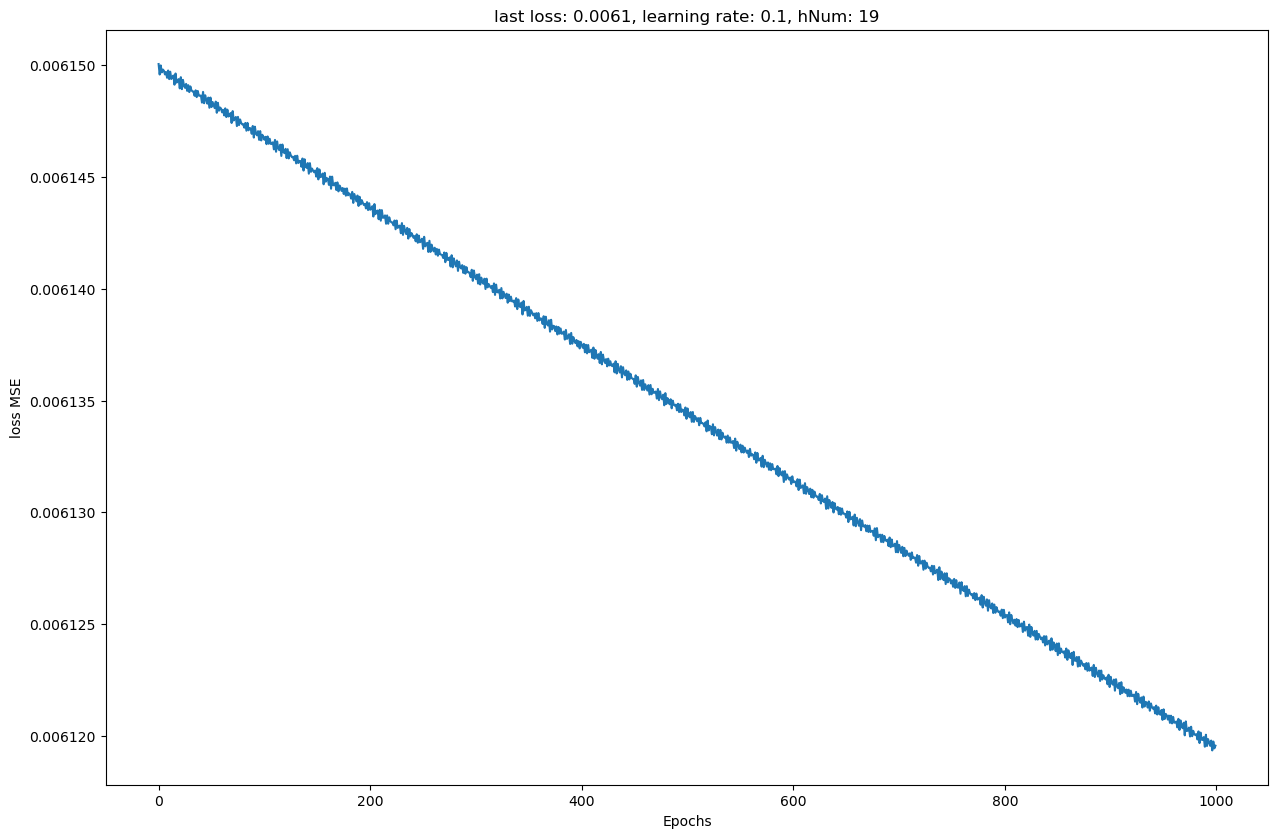

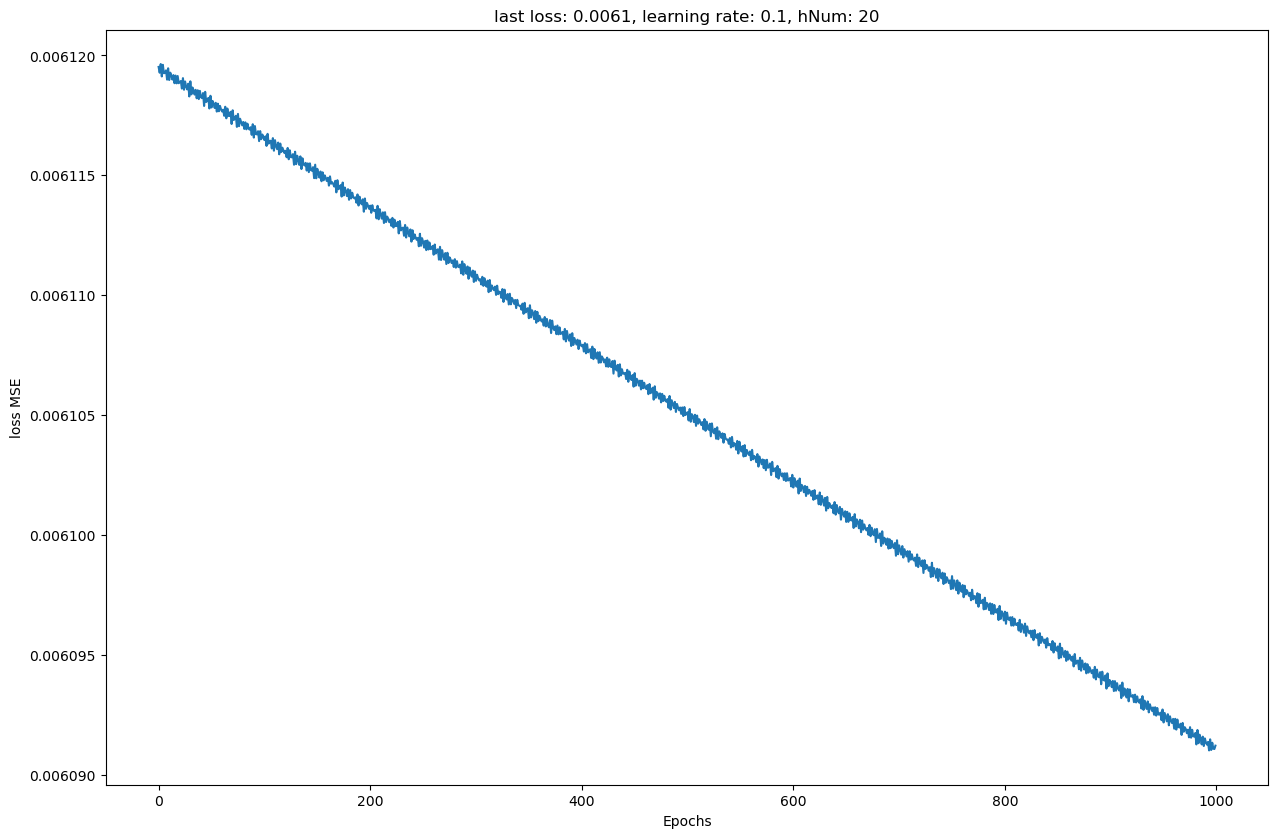

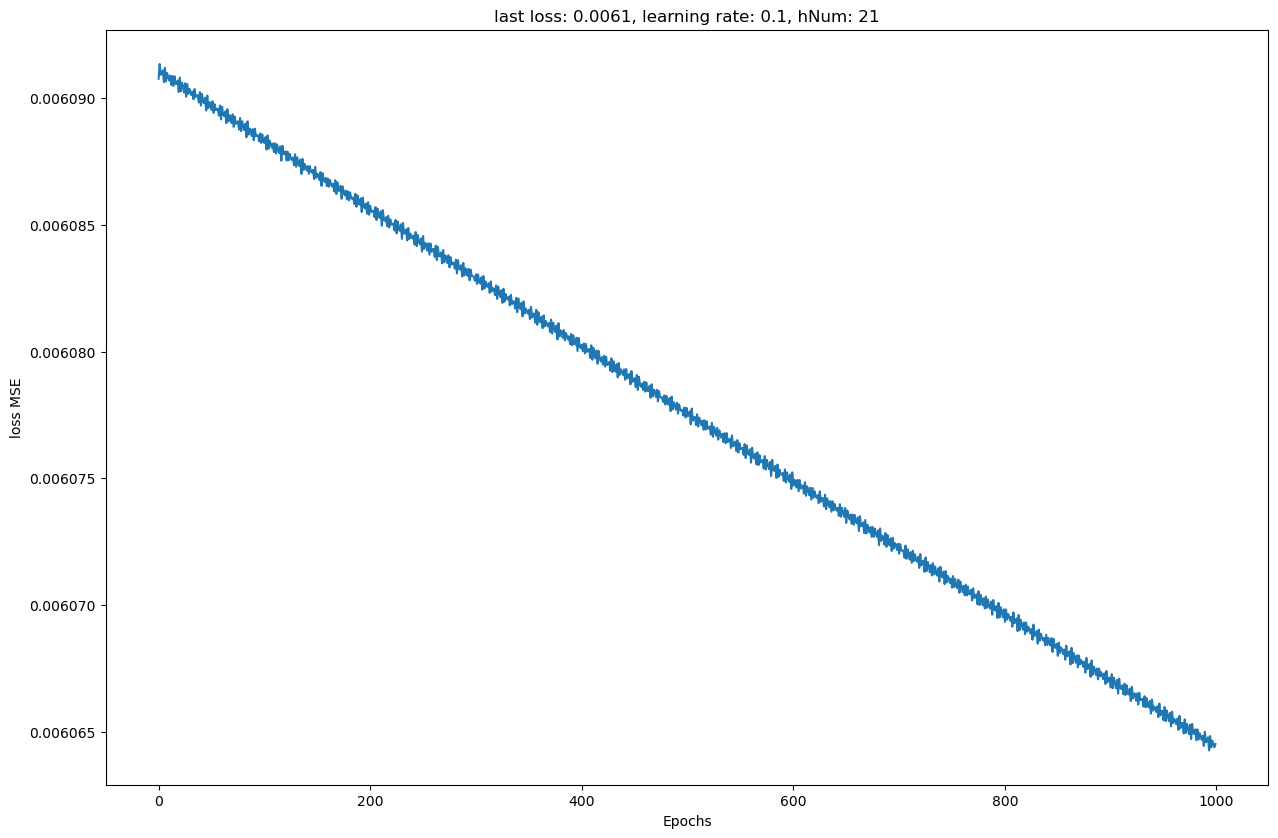

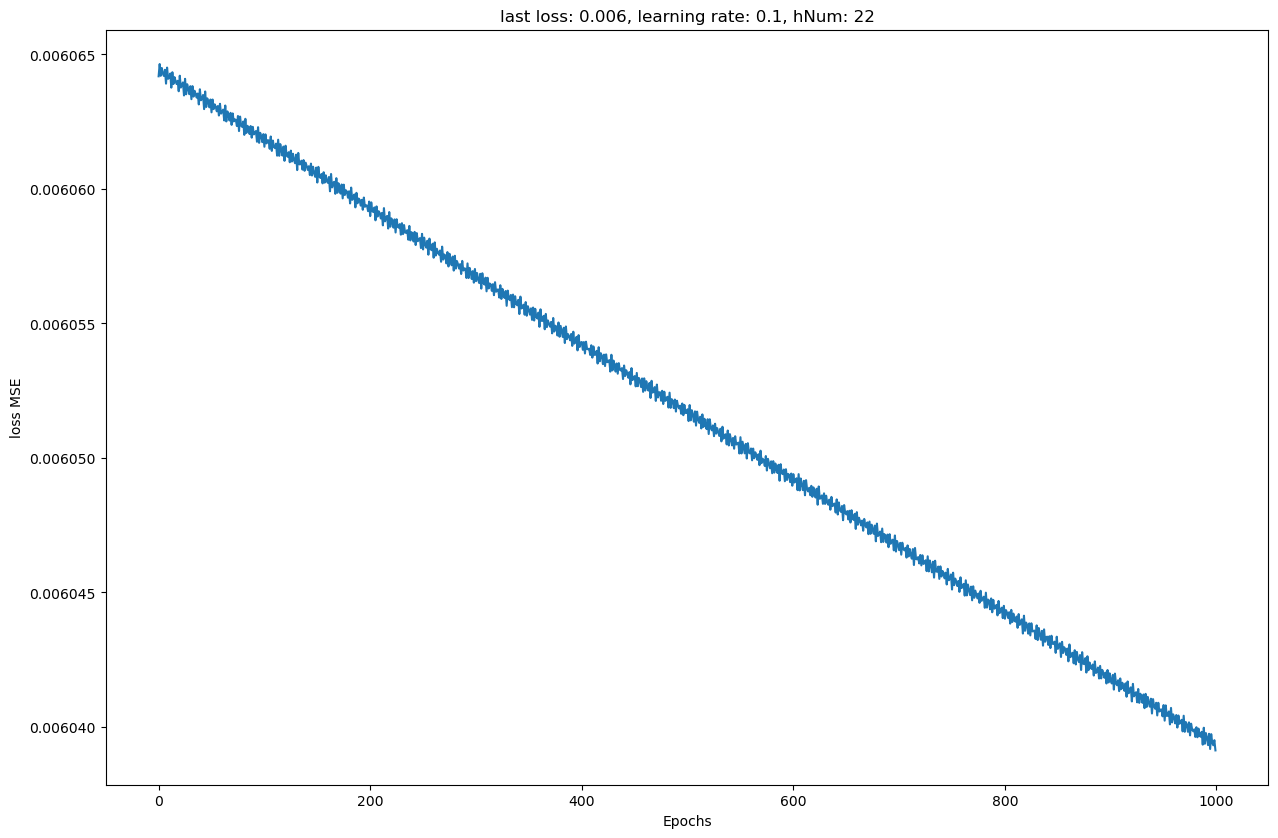

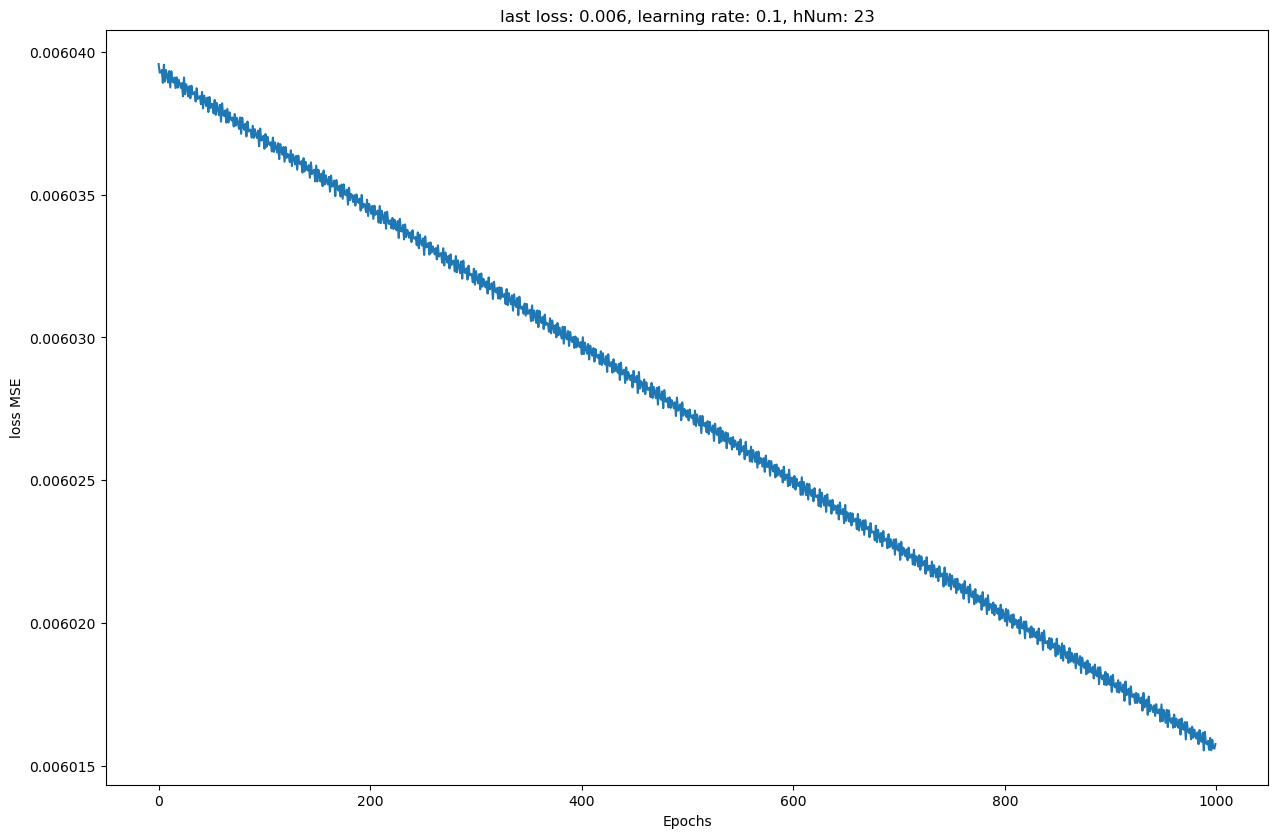

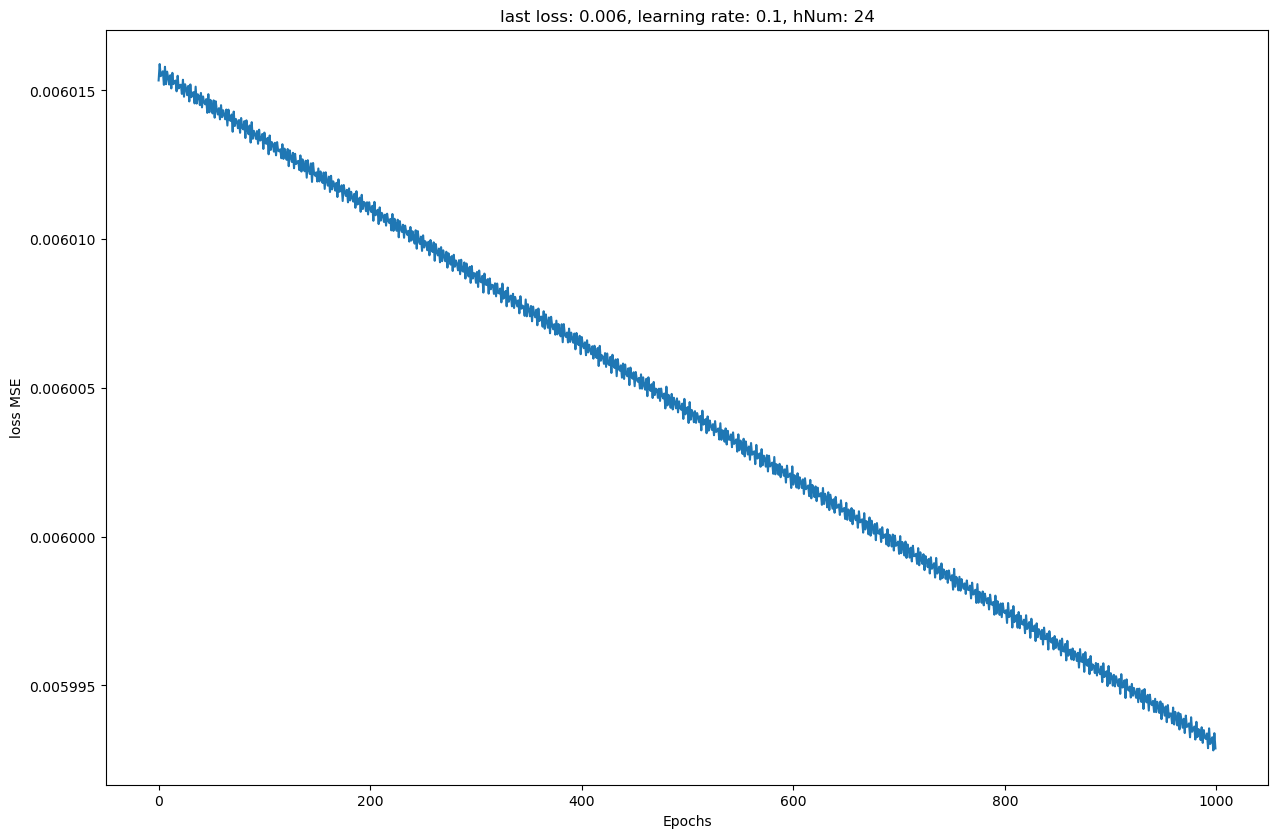

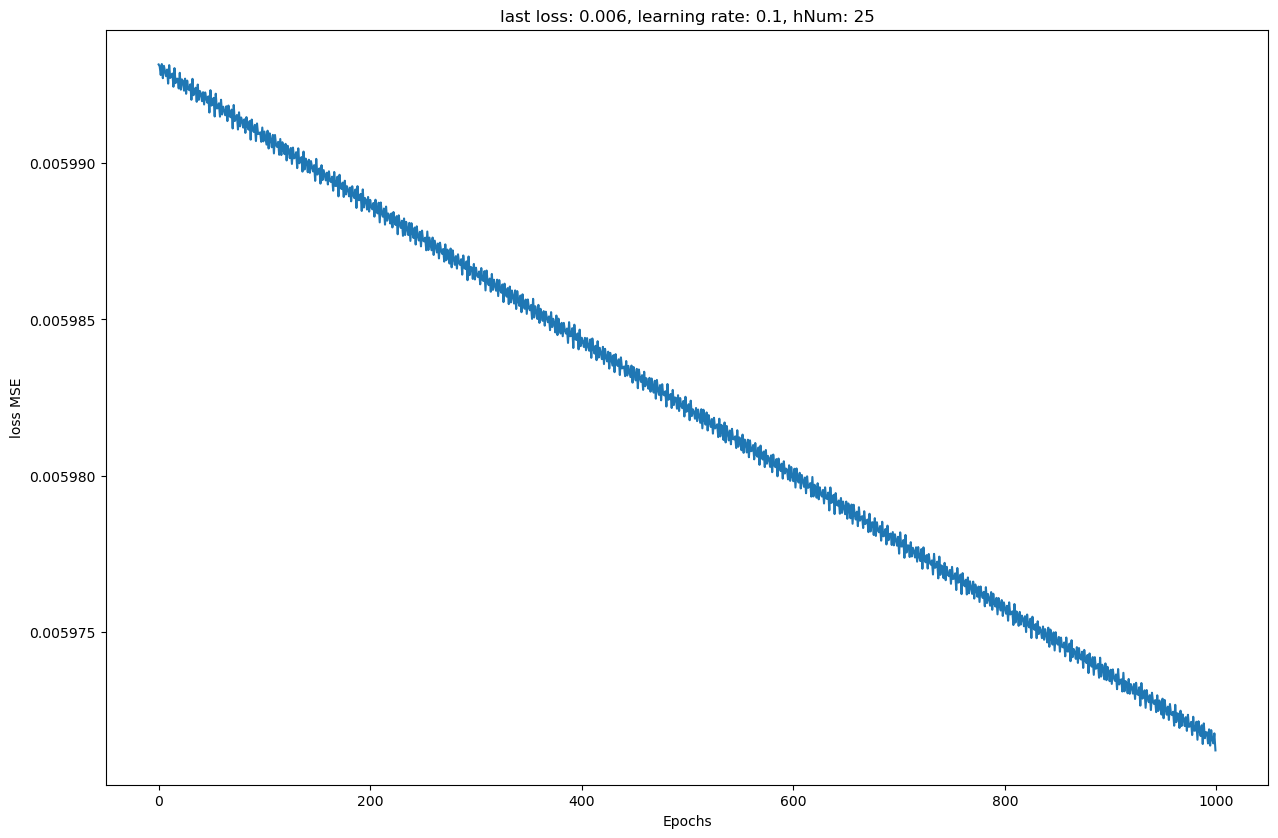

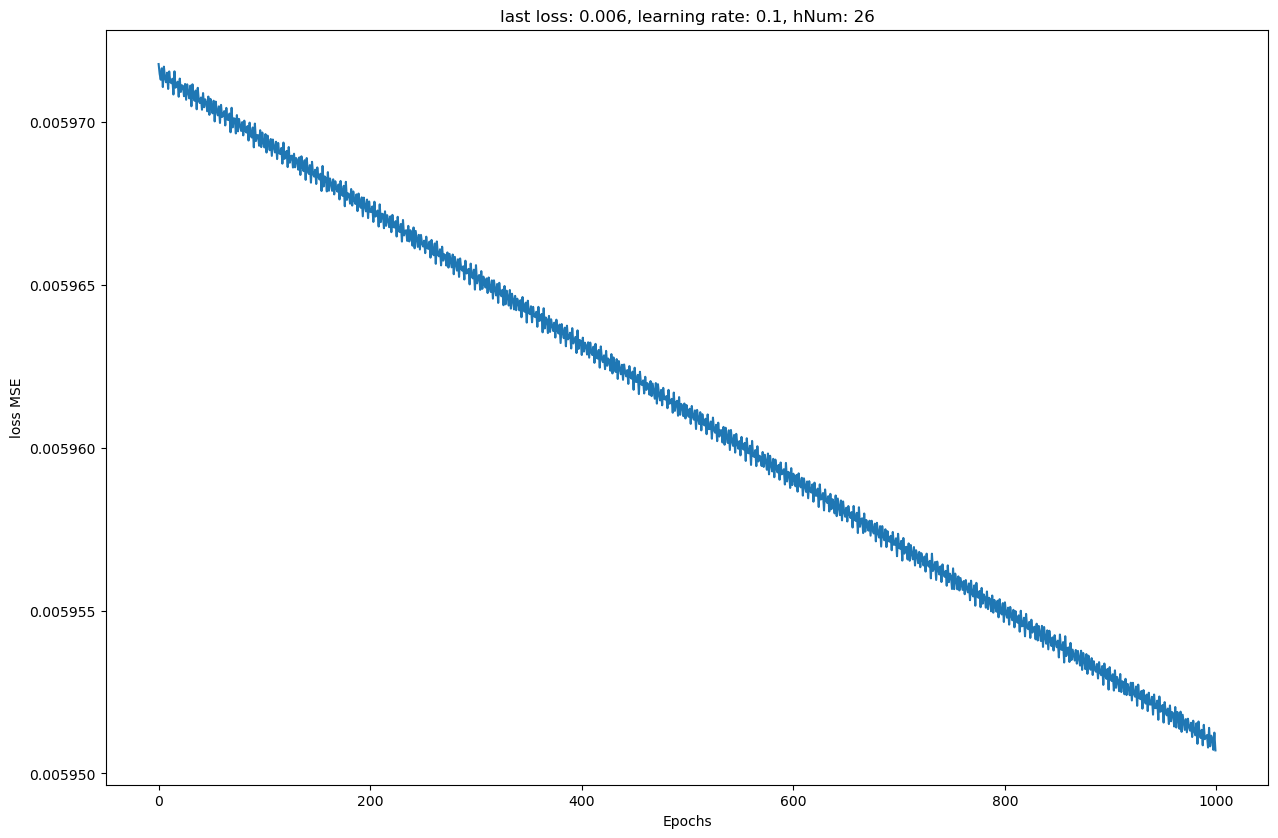

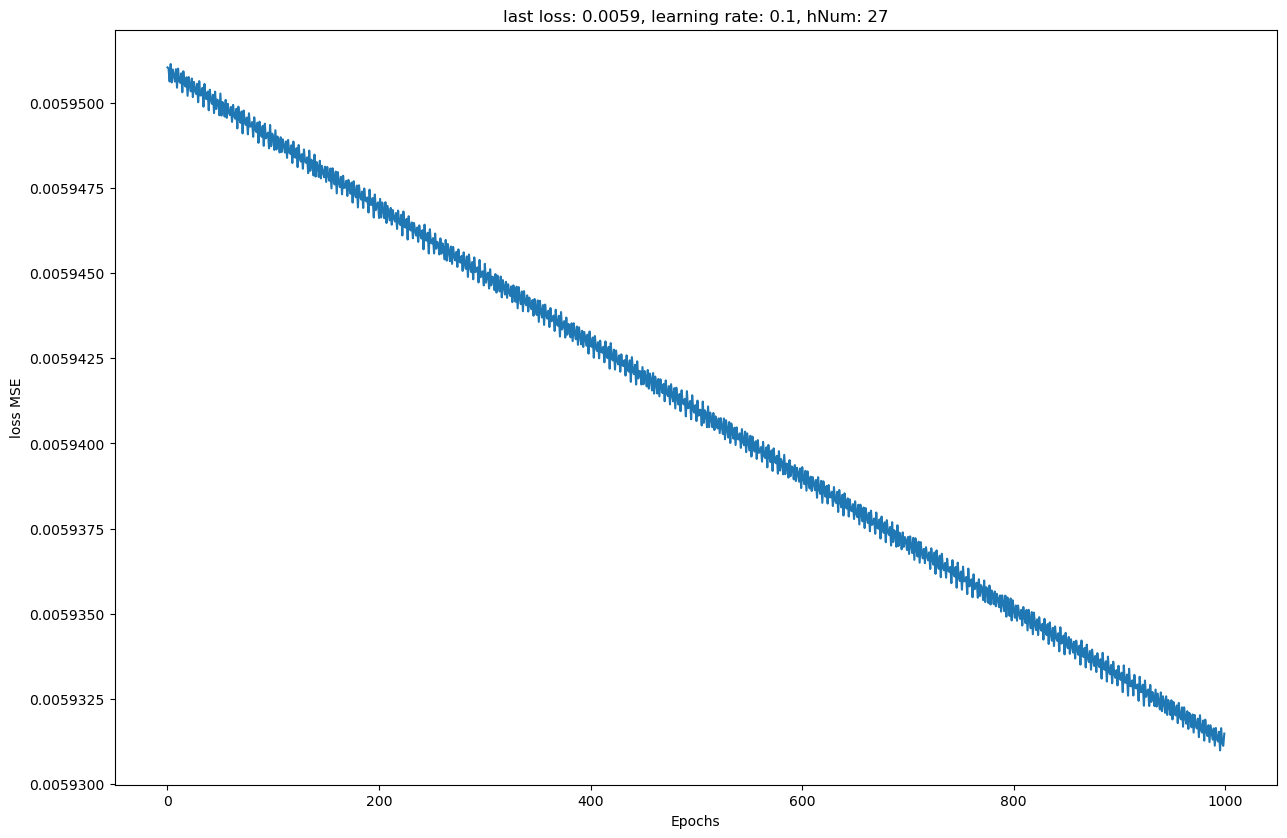

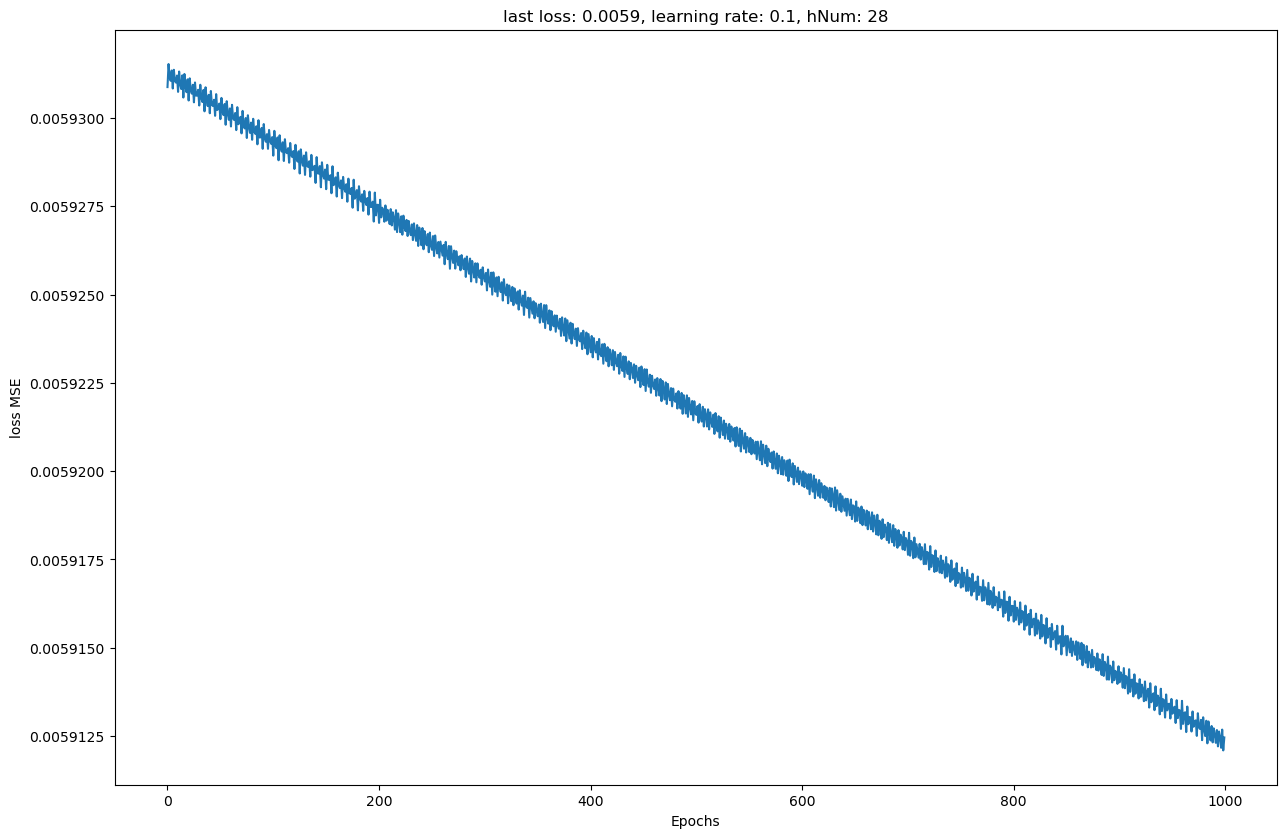

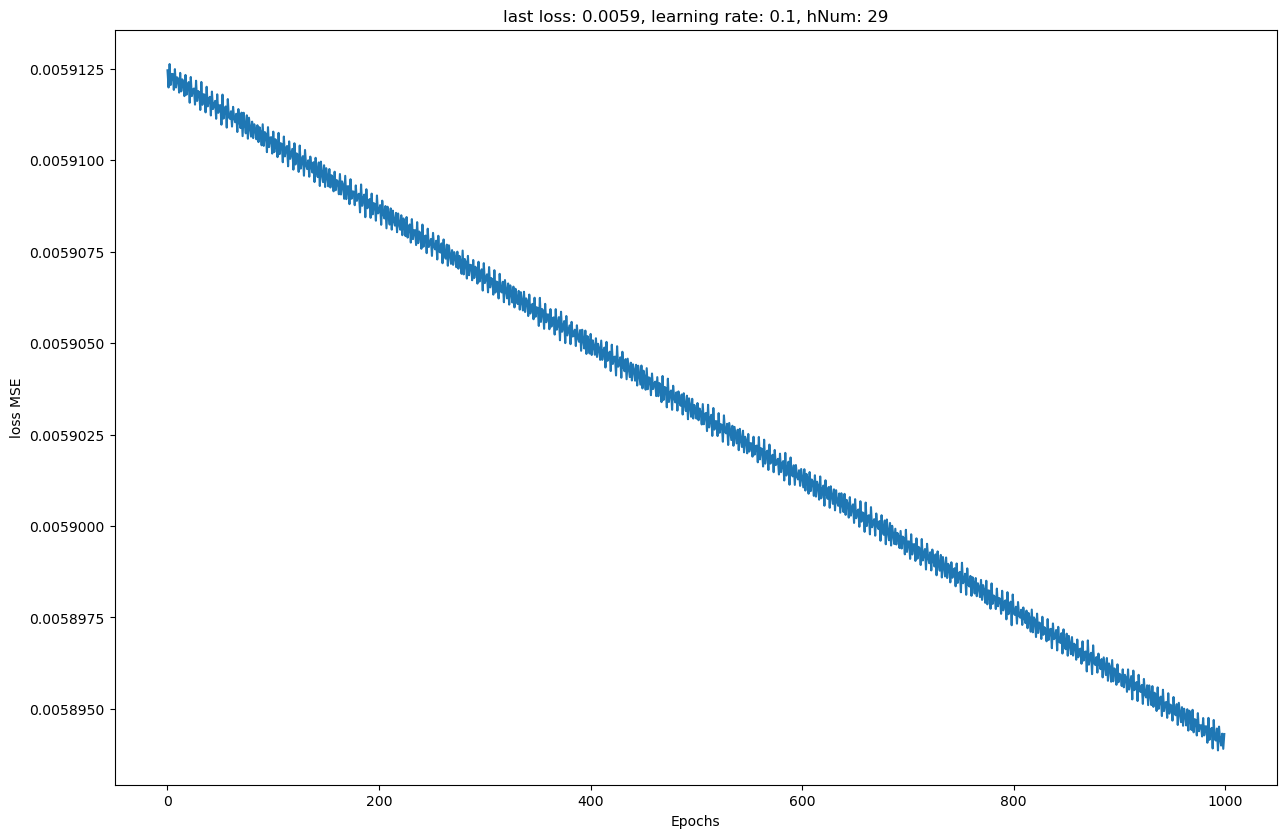

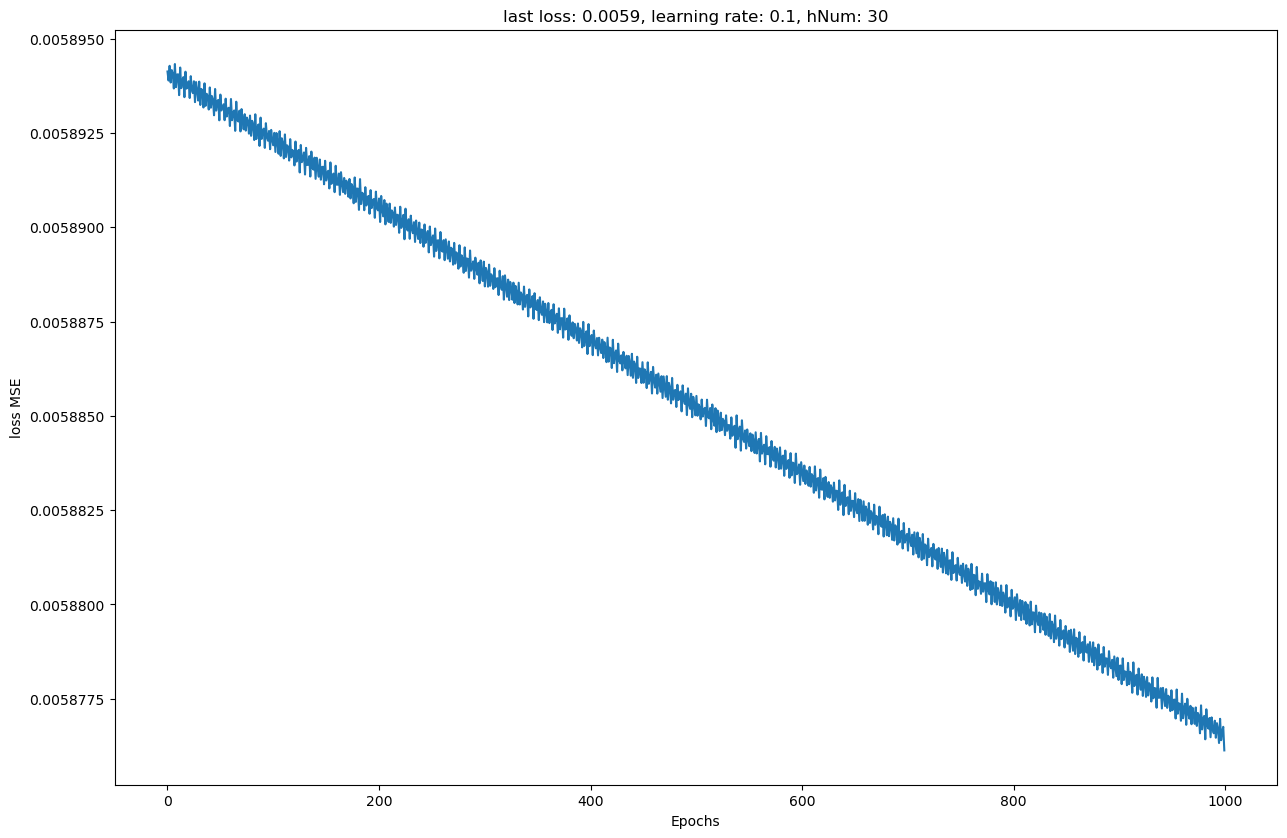

In [63]:
for n in neuron_list:
    loss_plotter(tragedy,
                 X_train,
                 y_train,
                 epochsNum=1000,
                 hNum=n,
                 learning_rate=0.1)

poprawa wyników stabilizuje się orientacyjnie przy 15 neuronach; później nie widać sensu dokładania ich więcej.

### 5. podsumowanie

In [64]:
comedy = modelANN(15, 0.1)

In [65]:
y_pred_optimized = comedy.predict([random_predict_list]).numpy()
print("previous prediction for random data : ", y_pred)
print("actual prediction for random data   : ", y_pred_optimized)

previous prediction for random data :  [[0.40473783]]
actual prediction for random data   :  [[0.66645443]]


In [66]:
tragedy.fit(X_train, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0058769514>

In [67]:
comedy.fit(X_train, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.14672305>

In [68]:
print("MSE for tragedy model: ", tragedy.lossMSE(y_pred, y_train))
print("MSE for comedy model  : ", comedy.lossMSE(y_pred_optimized,y_train))

MSE for tragedy model:  tf.Tensor(0.32813996, shape=(), dtype=float32)
MSE for comedy model  :  tf.Tensor(0.15702757, shape=(), dtype=float32)


In [69]:
y_pred_tragedy = np.greater_equal(tragedy.predict(X_test).numpy(),0.5).astype(np.int32)
y_pred_comedy = np.greater_equal(comedy.predict(X_test).numpy(),0.5).astype(np.int32)

In [70]:
print("tragedy fbeta scorer: ", fbeta_score(y_test, y_pred_tragedy, beta=1.31))
print("comedy fbeta scorer : ", fbeta_score(y_test, y_pred_comedy, beta=1.31))

tragedy fbeta scorer:  0.6598760060839749
comedy fbeta scorer :  0.9549348046051179


learning_rate wpisane wstępnie na 0.1 okazało się nawet że trafione.

Model poprawiony (comedy) charakteryzuje się widocznie lepszą wartością wybranej metryki oceny w porównaniu do modelu randomowego (tragedy), którego paramsy wpisywałem bez zastanowienia.<br>
Nawet szukanie po łebkach parametrów sieci i decydowanie na zasadzie 'wydaje się, że tyle będzie w porządku' daje widoczne rezultaty. Warto temat zgłebić aby uzyskać jeszcze lepszy, możliwie optymalny reultat z najmniejszym błędem.

## BRUDNOPIS